In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import random
from scipy.interpolate import interpn
from scipy.spatial import cKDTree
import nbimporter
import subprocess

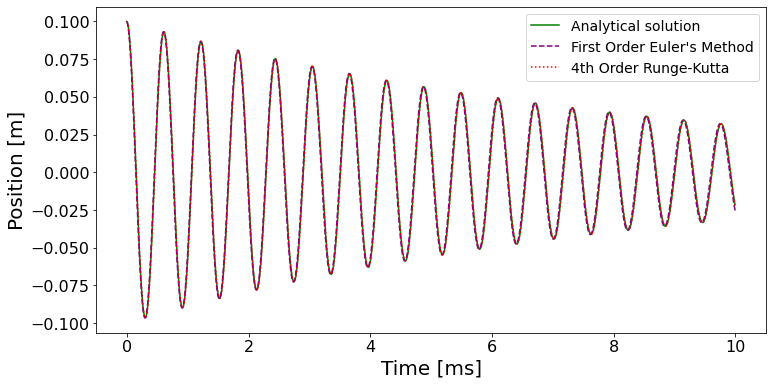

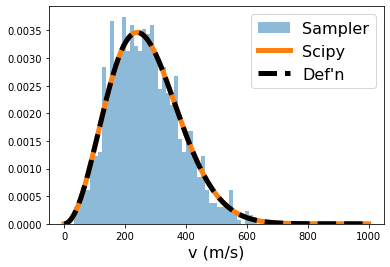

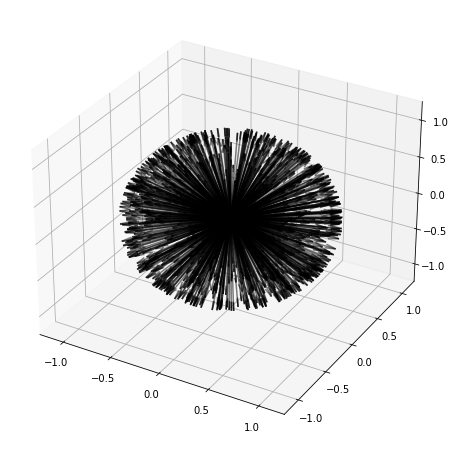

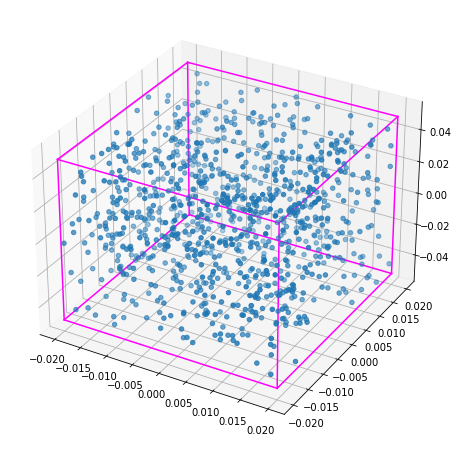

In [34]:
# Import B-field functions
%run CoilCreator.ipynb
# Import simulation functions
%run CesiumMOT.ipynb

# Constants of Parameter Search

In [35]:
# Physical Constants
hbar = 1.055 * 10**(-34) # Js, reduced Planck's constant
light_c = 2.998 * 10**(8) # m/s
BohrMag = 9.27401008 * 10**(-24) # A m^2

# Cesium Specifics
mass = 2.20694695 * 10**(-25) # kg 
gamma = 5.22 * 10**(6) # Hz, natural line width of Cs D2 transition. Lam p. 86.
omega_D2 = 2*np.pi* 351.72571859 * 10**(12) # Hz. Steck p. 15: https://steck.us/alkalidata/cesiumnumbers.1.6.pdf

# Apparatus
tube_diam = 1.5 * 10**(-3) # meters, equal to 1.5mm, differential pumping tube diameter
tube_length = 20 * 10**(-3) # meters, equal to 20mm, differential pumping tube length

# Cell dimensions. Will group.
x_len = 0.04 # m
y_len = 0.04 # m
z_len = 0.1  #m

# Beams
long_cooling_waist = 34 * 10**(-3) # m. Equal to 8mm. Will Group
short_cooling_waist = 8 * 10**(-3) # m. Equal to 8mm. Will Group.
push_waist = 2.2 * 10**(-3) # m. Equal to 2.2 mm. Circularly symmetric.

# Optimize
s0_cooling = 23 
#s0_push = 20
det_x = -1.9*gamma 
det_y = -1.9*gamma  

det_push = -1.9*gamma
det_counter = -3.5*gamma

# Parameter Search Protocol

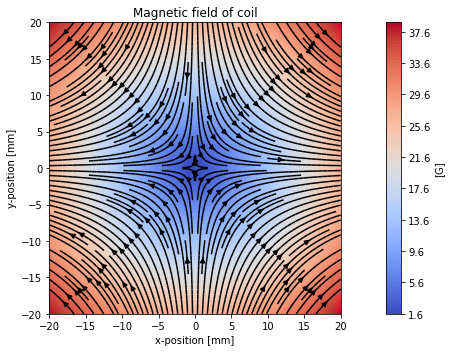

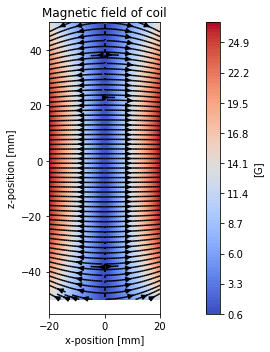

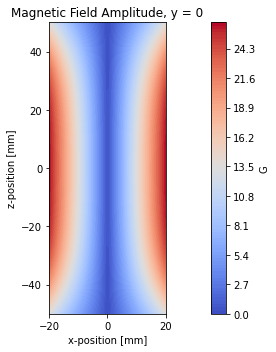

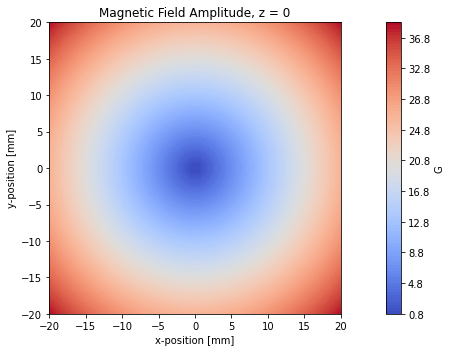

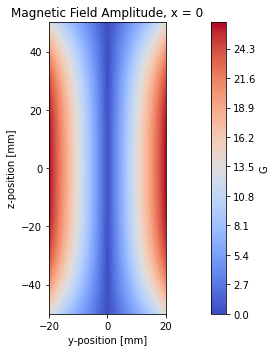

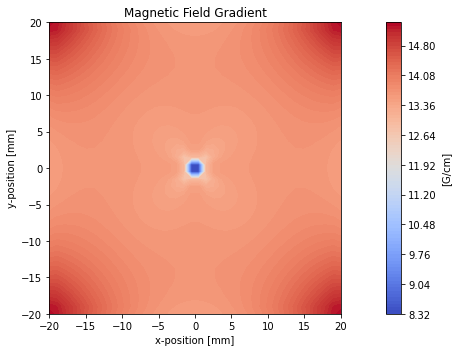

In [38]:
# Generate quadcoil for the run.
quadcoil = makeQuadCoil(winds = 10, dist = 50, diam = 100, curr = 330, width = 1, anti = -1)
describeCoil(quadcoil)

In [39]:
# Generate B-field grid
tree, Bfields = buildBfieldGrid(quadcoil, grid_spacing = 2 * 10**(-4))

B-field Grid shape:  200 x 200 x 500
Step 10 / 200 done. | Total time elapsed = 1.862 seconds
Step 20 / 200 done. | Total time elapsed = 3.474 seconds
Step 30 / 200 done. | Total time elapsed = 4.907 seconds
Step 40 / 200 done. | Total time elapsed = 6.436 seconds
Step 50 / 200 done. | Total time elapsed = 8.169 seconds
Step 60 / 200 done. | Total time elapsed = 9.66 seconds
Step 70 / 200 done. | Total time elapsed = 11.116 seconds
Step 80 / 200 done. | Total time elapsed = 12.541 seconds
Step 90 / 200 done. | Total time elapsed = 13.93 seconds
Step 100 / 200 done. | Total time elapsed = 15.384 seconds
Step 110 / 200 done. | Total time elapsed = 17.499 seconds
Step 120 / 200 done. | Total time elapsed = 19.293 seconds
Step 130 / 200 done. | Total time elapsed = 20.996 seconds
Step 140 / 200 done. | Total time elapsed = 22.494 seconds
Step 150 / 200 done. | Total time elapsed = 23.967 seconds
Step 160 / 200 done. | Total time elapsed = 25.429 seconds
Step 170 / 200 done. | Total time el

Starting sim for s0_push = 0
Simulating the trajectories of 300000 atoms...
Done with run  0  | Total time elapsed = 0.0 minutes
Done with run  3000  | Total time elapsed = 0.273 minutes
Done with run  6000  | Total time elapsed = 0.511 minutes
Done with run  9000  | Total time elapsed = 0.733 minutes
Done with run  12000  | Total time elapsed = 0.951 minutes
Done with run  15000  | Total time elapsed = 1.173 minutes
Done with run  18000  | Total time elapsed = 1.397 minutes
Done with run  21000  | Total time elapsed = 1.628 minutes
Done with run  24000  | Total time elapsed = 1.852 minutes
Done with run  27000  | Total time elapsed = 2.088 minutes
Done with run  30000  | Total time elapsed = 2.315 minutes
Done with run  33000  | Total time elapsed = 2.545 minutes
Done with run  36000  | Total time elapsed = 2.769 minutes
Done with run  39000  | Total time elapsed = 3.013 minutes
Done with run  42000  | Total time elapsed = 3.253 minutes
Done with run  45000  | Total time elapsed = 3.4

/Users/ChristianHaroldNunez/opt/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Done with run  3000  | Total time elapsed = 0.266 minutes
Done with run  6000  | Total time elapsed = 0.538 minutes
Done with run  9000  | Total time elapsed = 0.817 minutes
Done with run  12000  | Total time elapsed = 1.094 minutes
Done with run  15000  | Total time elapsed = 1.335 minutes
Done with run  18000  | Total time elapsed = 1.584 minutes
Done with run  21000  | Total time elapsed = 1.824 minutes
Done with run  24000  | Total time elapsed = 2.069 minutes
Done with run  27000  | Total time elapsed = 2.33 minutes
Done with run  30000  | Total time elapsed = 2.584 minutes
Done with run  33000  | Total time elapsed = 2.809 minutes
Done with run  36000  | Total time elapsed = 3.05 minutes
Done with run  39000  | Total time elapsed = 3.287 minutes
Done with run  42000  | Total time elapsed = 3.529 minutes
Success at n =  43687
Done with run  45000  | Total time elapsed = 3.771 minutes
Done with run  48000  | Total time elapsed = 4.012 minutes
Done with run  51000  | Total time elap

Done with run  63000  | Total time elapsed = 4.851 minutes
Done with run  66000  | Total time elapsed = 5.076 minutes
Done with run  69000  | Total time elapsed = 5.302 minutes
Done with run  72000  | Total time elapsed = 5.528 minutes
Done with run  75000  | Total time elapsed = 5.757 minutes
Done with run  78000  | Total time elapsed = 5.979 minutes
Done with run  81000  | Total time elapsed = 6.244 minutes
Done with run  84000  | Total time elapsed = 6.469 minutes
Done with run  87000  | Total time elapsed = 6.698 minutes
Done with run  90000  | Total time elapsed = 6.928 minutes
Done with run  93000  | Total time elapsed = 7.18 minutes
Done with run  96000  | Total time elapsed = 7.413 minutes
Done with run  99000  | Total time elapsed = 7.642 minutes
Done with run  102000  | Total time elapsed = 7.885 minutes
Done with run  105000  | Total time elapsed = 8.106 minutes
Done with run  108000  | Total time elapsed = 8.343 minutes
Done with run  111000  | Total time elapsed = 8.578 mi

Done with run  126000  | Total time elapsed = 9.678 minutes
Done with run  129000  | Total time elapsed = 9.905 minutes
Done with run  132000  | Total time elapsed = 10.13 minutes
Done with run  135000  | Total time elapsed = 10.37 minutes
Done with run  138000  | Total time elapsed = 10.607 minutes
Done with run  141000  | Total time elapsed = 10.837 minutes
Done with run  144000  | Total time elapsed = 11.064 minutes
Done with run  147000  | Total time elapsed = 11.288 minutes
Done with run  150000  | Total time elapsed = 11.507 minutes
Done with run  153000  | Total time elapsed = 11.76 minutes
Done with run  156000  | Total time elapsed = 11.988 minutes
Done with run  159000  | Total time elapsed = 12.218 minutes
Success at n =  161290
Done with run  162000  | Total time elapsed = 12.453 minutes
Done with run  165000  | Total time elapsed = 12.69 minutes
Done with run  168000  | Total time elapsed = 12.921 minutes
Done with run  171000  | Total time elapsed = 13.141 minutes
Done wi

Done with run  192000  | Total time elapsed = 14.585 minutes
Done with run  195000  | Total time elapsed = 14.814 minutes
Success at n =  196968
Done with run  198000  | Total time elapsed = 15.044 minutes
Done with run  201000  | Total time elapsed = 15.27 minutes
Success at n =  201184
Done with run  204000  | Total time elapsed = 15.506 minutes
Done with run  207000  | Total time elapsed = 15.756 minutes
Done with run  210000  | Total time elapsed = 15.992 minutes
Done with run  213000  | Total time elapsed = 16.219 minutes
Done with run  216000  | Total time elapsed = 16.454 minutes
Done with run  219000  | Total time elapsed = 16.685 minutes
Success at n =  221888
Done with run  222000  | Total time elapsed = 16.922 minutes
Done with run  225000  | Total time elapsed = 17.159 minutes
Done with run  228000  | Total time elapsed = 17.387 minutes
Success at n =  228555
Done with run  231000  | Total time elapsed = 17.62 minutes
Success at n =  233383
Done with run  234000  | Total ti

Done with run  252000  | Total time elapsed = 19.348 minutes
Done with run  255000  | Total time elapsed = 19.588 minutes
Success at n =  255546
Done with run  258000  | Total time elapsed = 19.82 minutes
Success at n =  258450
Success at n =  259591
Done with run  261000  | Total time elapsed = 20.062 minutes
Done with run  264000  | Total time elapsed = 20.301 minutes
Done with run  267000  | Total time elapsed = 20.519 minutes
Done with run  270000  | Total time elapsed = 20.743 minutes
Done with run  273000  | Total time elapsed = 20.963 minutes
Done with run  276000  | Total time elapsed = 21.188 minutes
Done with run  279000  | Total time elapsed = 21.424 minutes
Done with run  282000  | Total time elapsed = 21.65 minutes
Success at n =  282541
Success at n =  284998
Done with run  285000  | Total time elapsed = 21.89 minutes
Done with run  288000  | Total time elapsed = 22.119 minutes
Done with run  291000  | Total time elapsed = 22.351 minutes
Done with run  294000  | Total tim

Running # 1 out of 10
Running # 2 out of 10
Running # 3 out of 10
Running # 4 out of 10
Running # 5 out of 10
Running # 6 out of 10
Running # 7 out of 10
Running # 8 out of 10
Running # 9 out of 10
Running # 10 out of 10
Captures: 10
Starting sim for s0_push = 14
Simulating the trajectories of 300000 atoms...
Done with run  0  | Total time elapsed = 0.0 minutes
Done with run  3000  | Total time elapsed = 0.224 minutes
Done with run  6000  | Total time elapsed = 0.449 minutes
Success at n =  6930
Done with run  9000  | Total time elapsed = 0.684 minutes
Done with run  12000  | Total time elapsed = 0.916 minutes
Done with run  15000  | Total time elapsed = 1.135 minutes
Done with run  18000  | Total time elapsed = 1.361 minutes
Done with run  21000  | Total time elapsed = 1.581 minutes
Done with run  24000  | Total time elapsed = 1.807 minutes
Success at n =  26862
Done with run  27000  | Total time elapsed = 2.043 minutes
Done with run  30000  | Total time elapsed = 2.27 minutes
Success

Done with run  33000  | Total time elapsed = 2.506 minutes
Done with run  36000  | Total time elapsed = 2.726 minutes
Done with run  39000  | Total time elapsed = 2.954 minutes
Done with run  42000  | Total time elapsed = 3.173 minutes
Done with run  45000  | Total time elapsed = 3.406 minutes
Done with run  48000  | Total time elapsed = 3.636 minutes
Done with run  51000  | Total time elapsed = 3.862 minutes
Done with run  54000  | Total time elapsed = 4.09 minutes
Done with run  57000  | Total time elapsed = 4.316 minutes
Done with run  60000  | Total time elapsed = 4.549 minutes
Success at n =  61671
Done with run  63000  | Total time elapsed = 4.784 minutes
Done with run  66000  | Total time elapsed = 5.007 minutes
Done with run  69000  | Total time elapsed = 5.232 minutes
Done with run  72000  | Total time elapsed = 5.461 minutes
Done with run  75000  | Total time elapsed = 5.688 minutes
Done with run  78000  | Total time elapsed = 5.917 minutes
Done with run  81000  | Total time 

Done with run  102000  | Total time elapsed = 7.867 minutes
Done with run  105000  | Total time elapsed = 8.097 minutes
Done with run  108000  | Total time elapsed = 8.339 minutes
Done with run  111000  | Total time elapsed = 8.581 minutes
Done with run  114000  | Total time elapsed = 8.829 minutes
Done with run  117000  | Total time elapsed = 9.059 minutes
Done with run  120000  | Total time elapsed = 9.285 minutes
Done with run  123000  | Total time elapsed = 9.544 minutes
Done with run  126000  | Total time elapsed = 9.775 minutes
Done with run  129000  | Total time elapsed = 10.005 minutes
Done with run  132000  | Total time elapsed = 10.238 minutes
Done with run  135000  | Total time elapsed = 10.469 minutes
Done with run  138000  | Total time elapsed = 10.706 minutes
Done with run  141000  | Total time elapsed = 10.93 minutes
Done with run  144000  | Total time elapsed = 11.158 minutes
Done with run  147000  | Total time elapsed = 11.392 minutes
Success at n =  147342
Done with r

Done with run  165000  | Total time elapsed = 12.546 minutes
Done with run  168000  | Total time elapsed = 12.773 minutes
Done with run  171000  | Total time elapsed = 13.01 minutes
Done with run  174000  | Total time elapsed = 13.245 minutes
Done with run  177000  | Total time elapsed = 13.47 minutes
Done with run  180000  | Total time elapsed = 13.691 minutes
Done with run  183000  | Total time elapsed = 13.926 minutes
Success at n =  184486
Done with run  186000  | Total time elapsed = 14.17 minutes
Done with run  189000  | Total time elapsed = 14.395 minutes
Done with run  192000  | Total time elapsed = 14.618 minutes
Done with run  195000  | Total time elapsed = 14.852 minutes
Done with run  198000  | Total time elapsed = 15.08 minutes
Done with run  201000  | Total time elapsed = 15.304 minutes
Done with run  204000  | Total time elapsed = 15.53 minutes
Done with run  207000  | Total time elapsed = 15.759 minutes
Done with run  210000  | Total time elapsed = 15.987 minutes
Done w

/Users/ChristianHaroldNunez/opt/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Running # 1 out of 7
Running # 2 out of 7
Running # 3 out of 7
Running # 4 out of 7
Running # 5 out of 7
Running # 6 out of 7
Running # 7 out of 7
Captures: 7


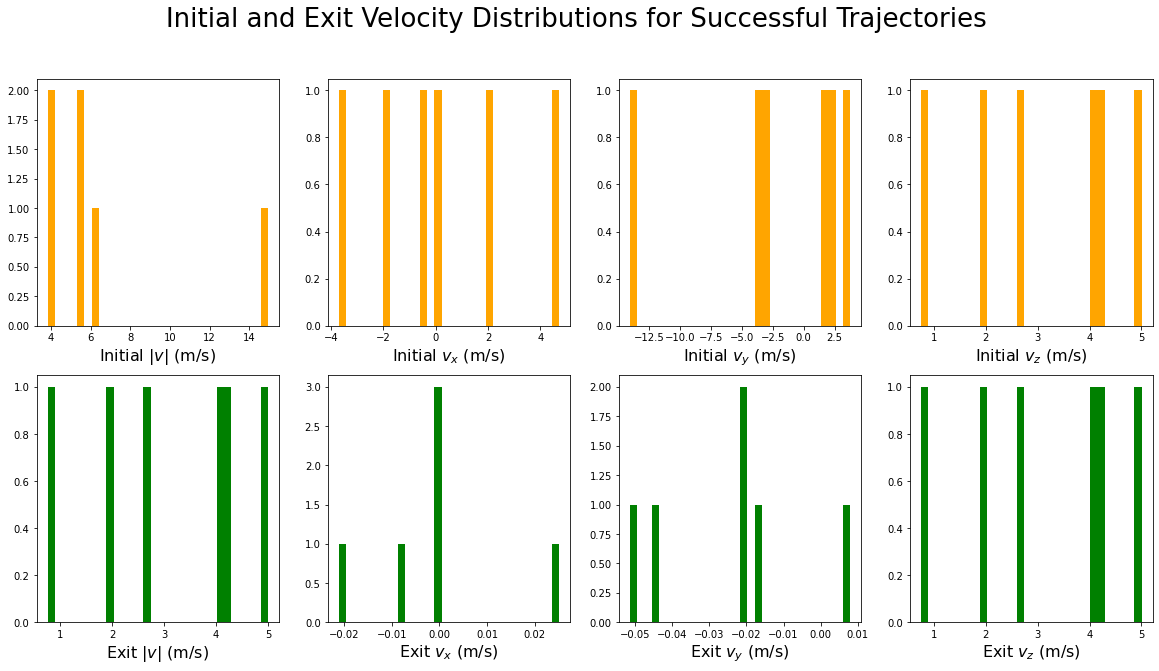

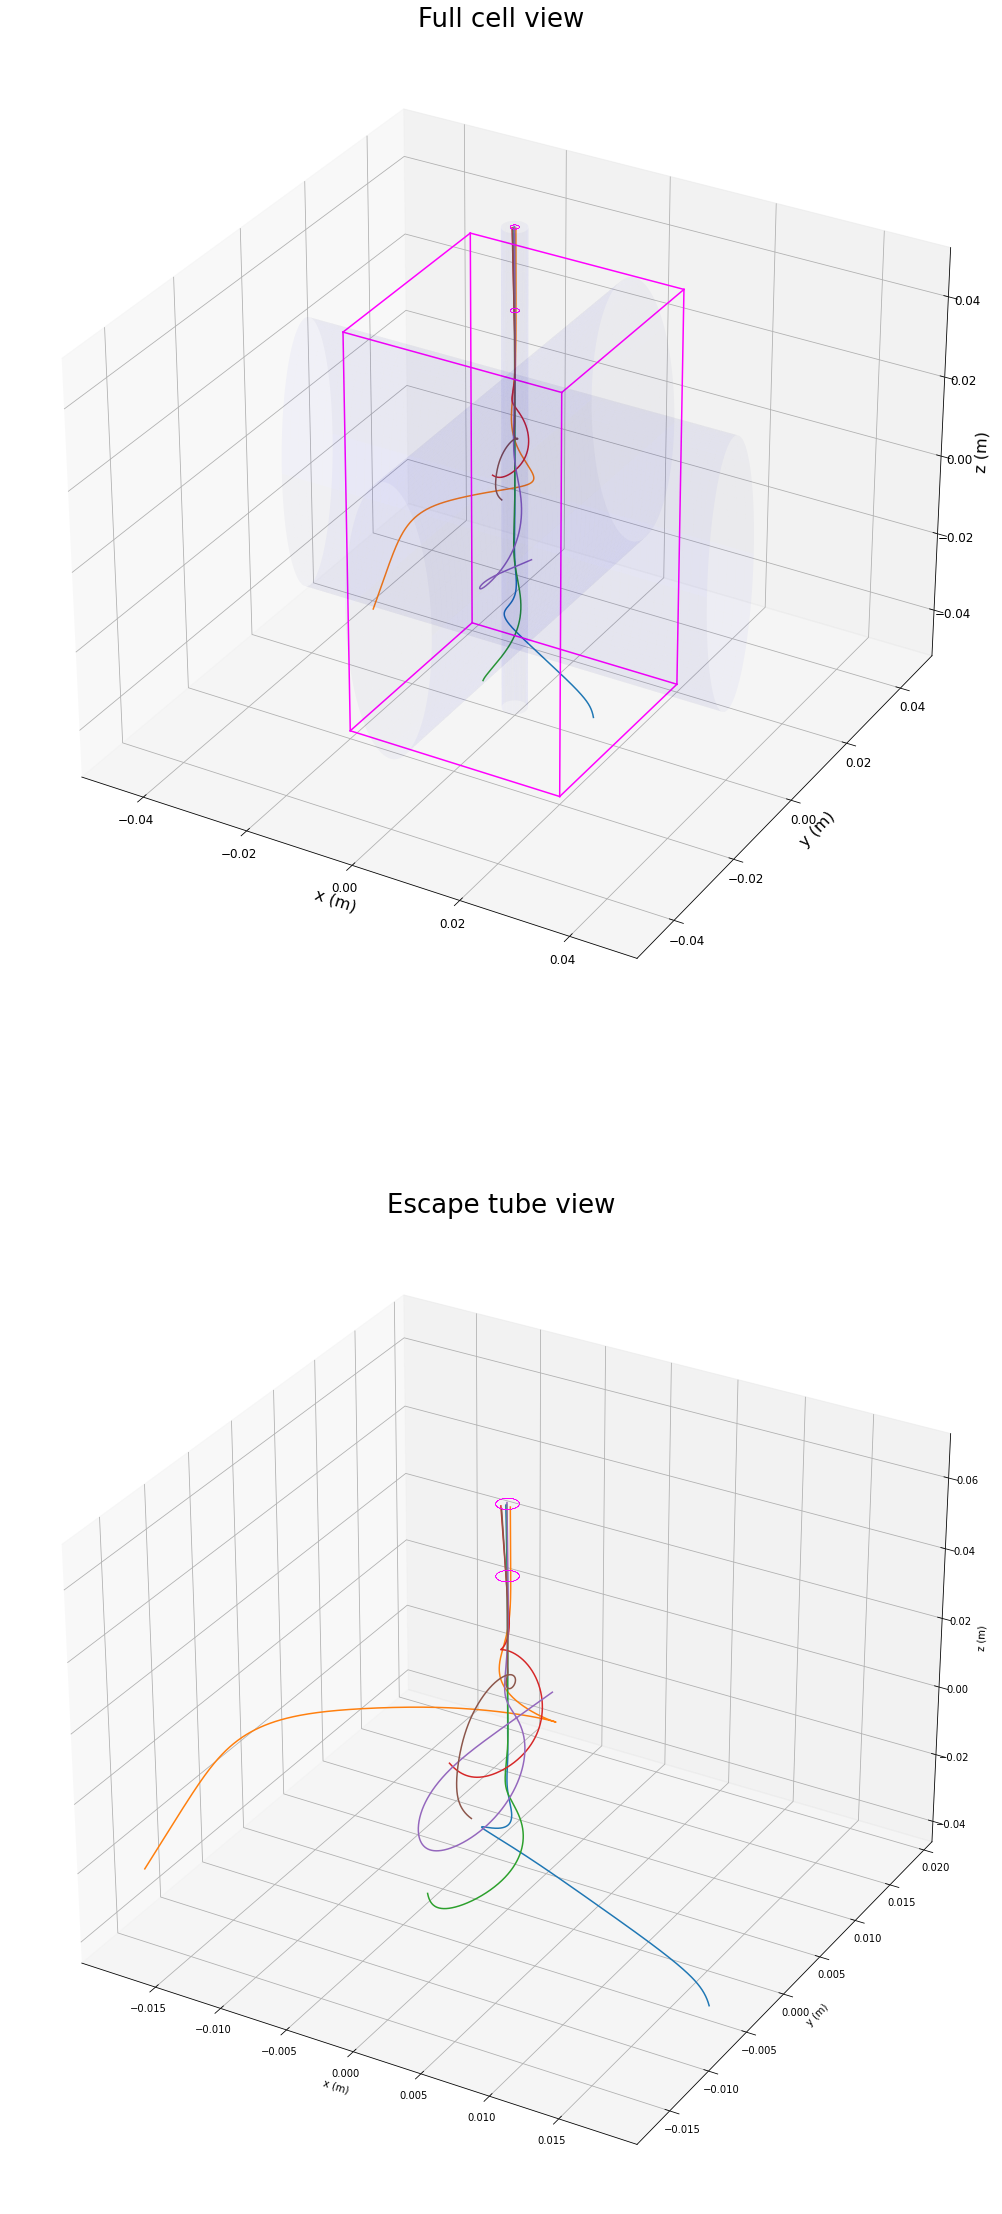

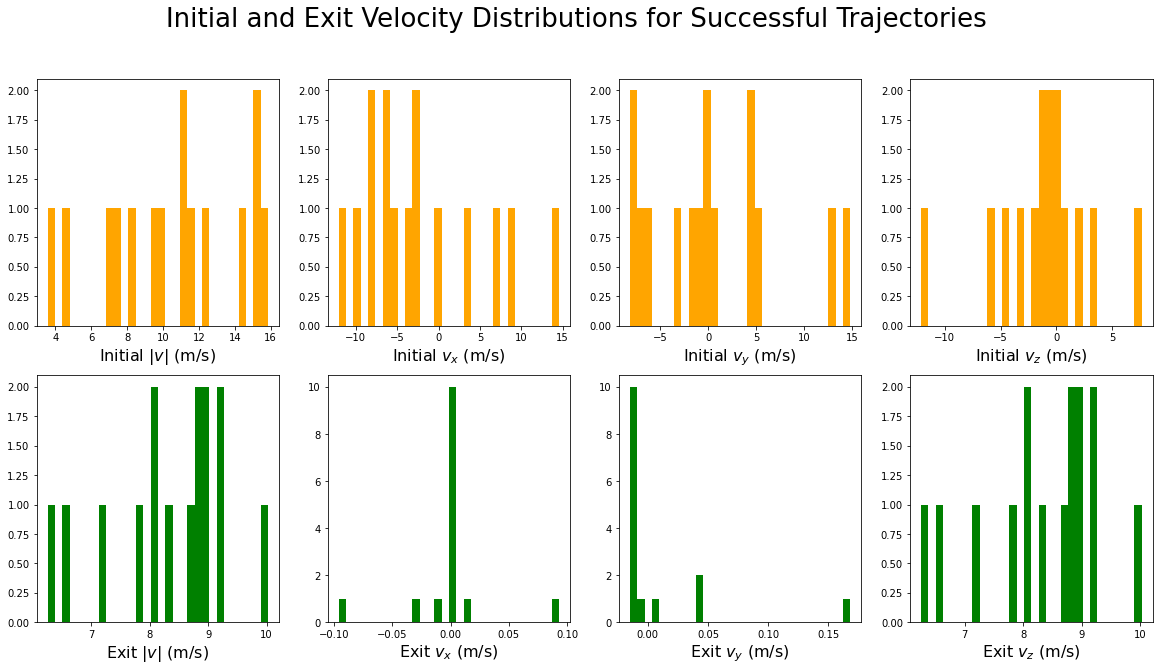

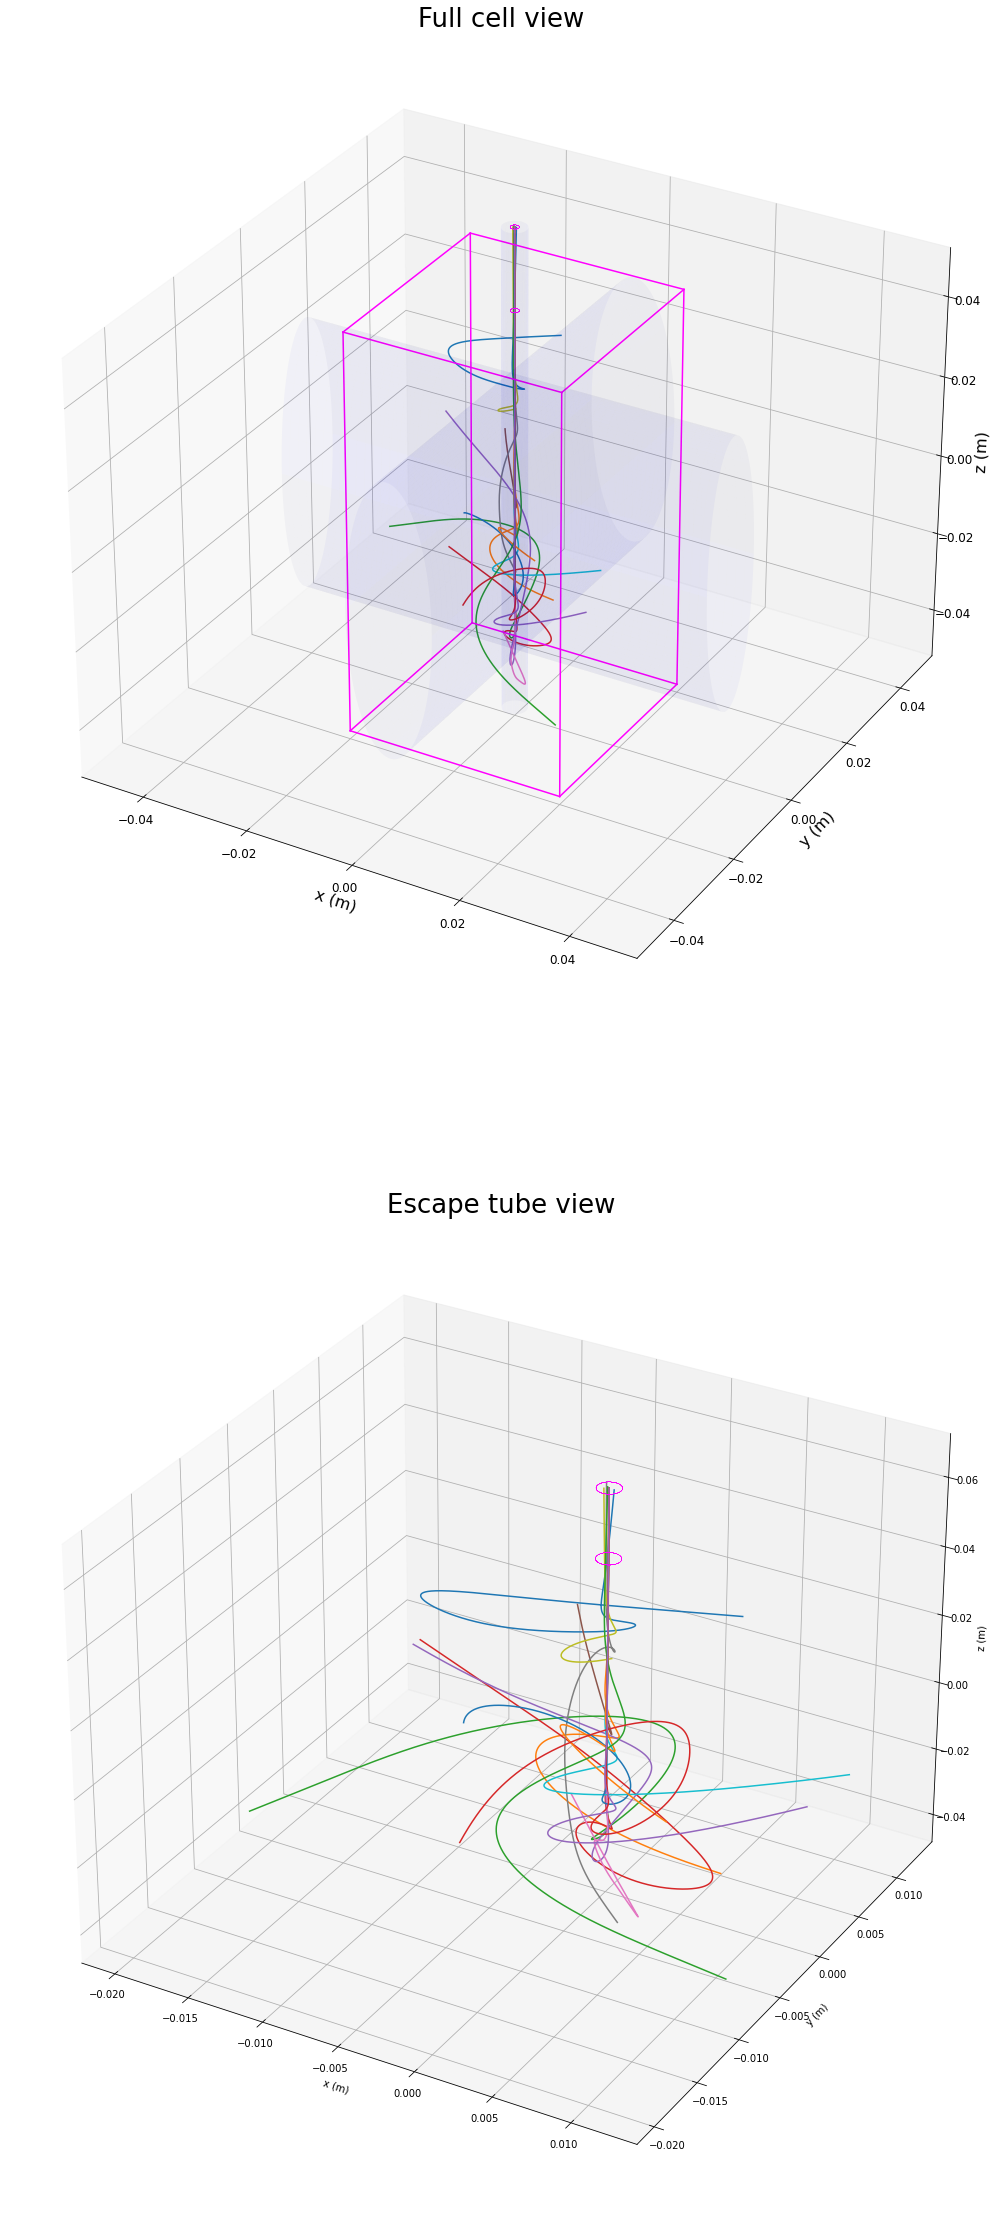

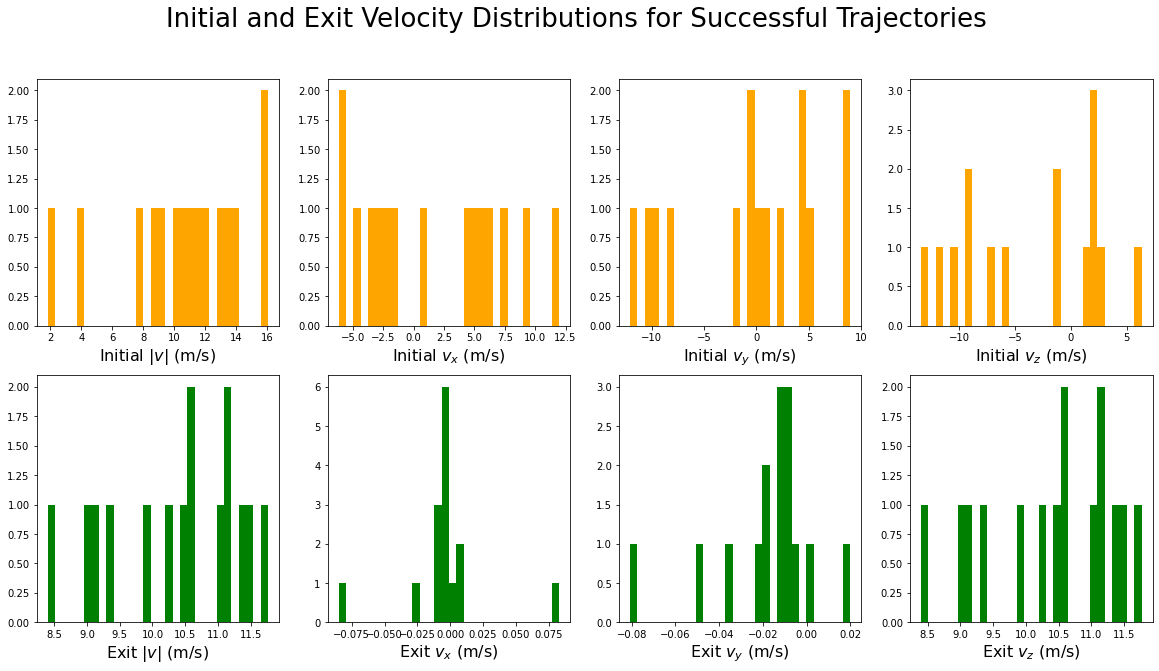

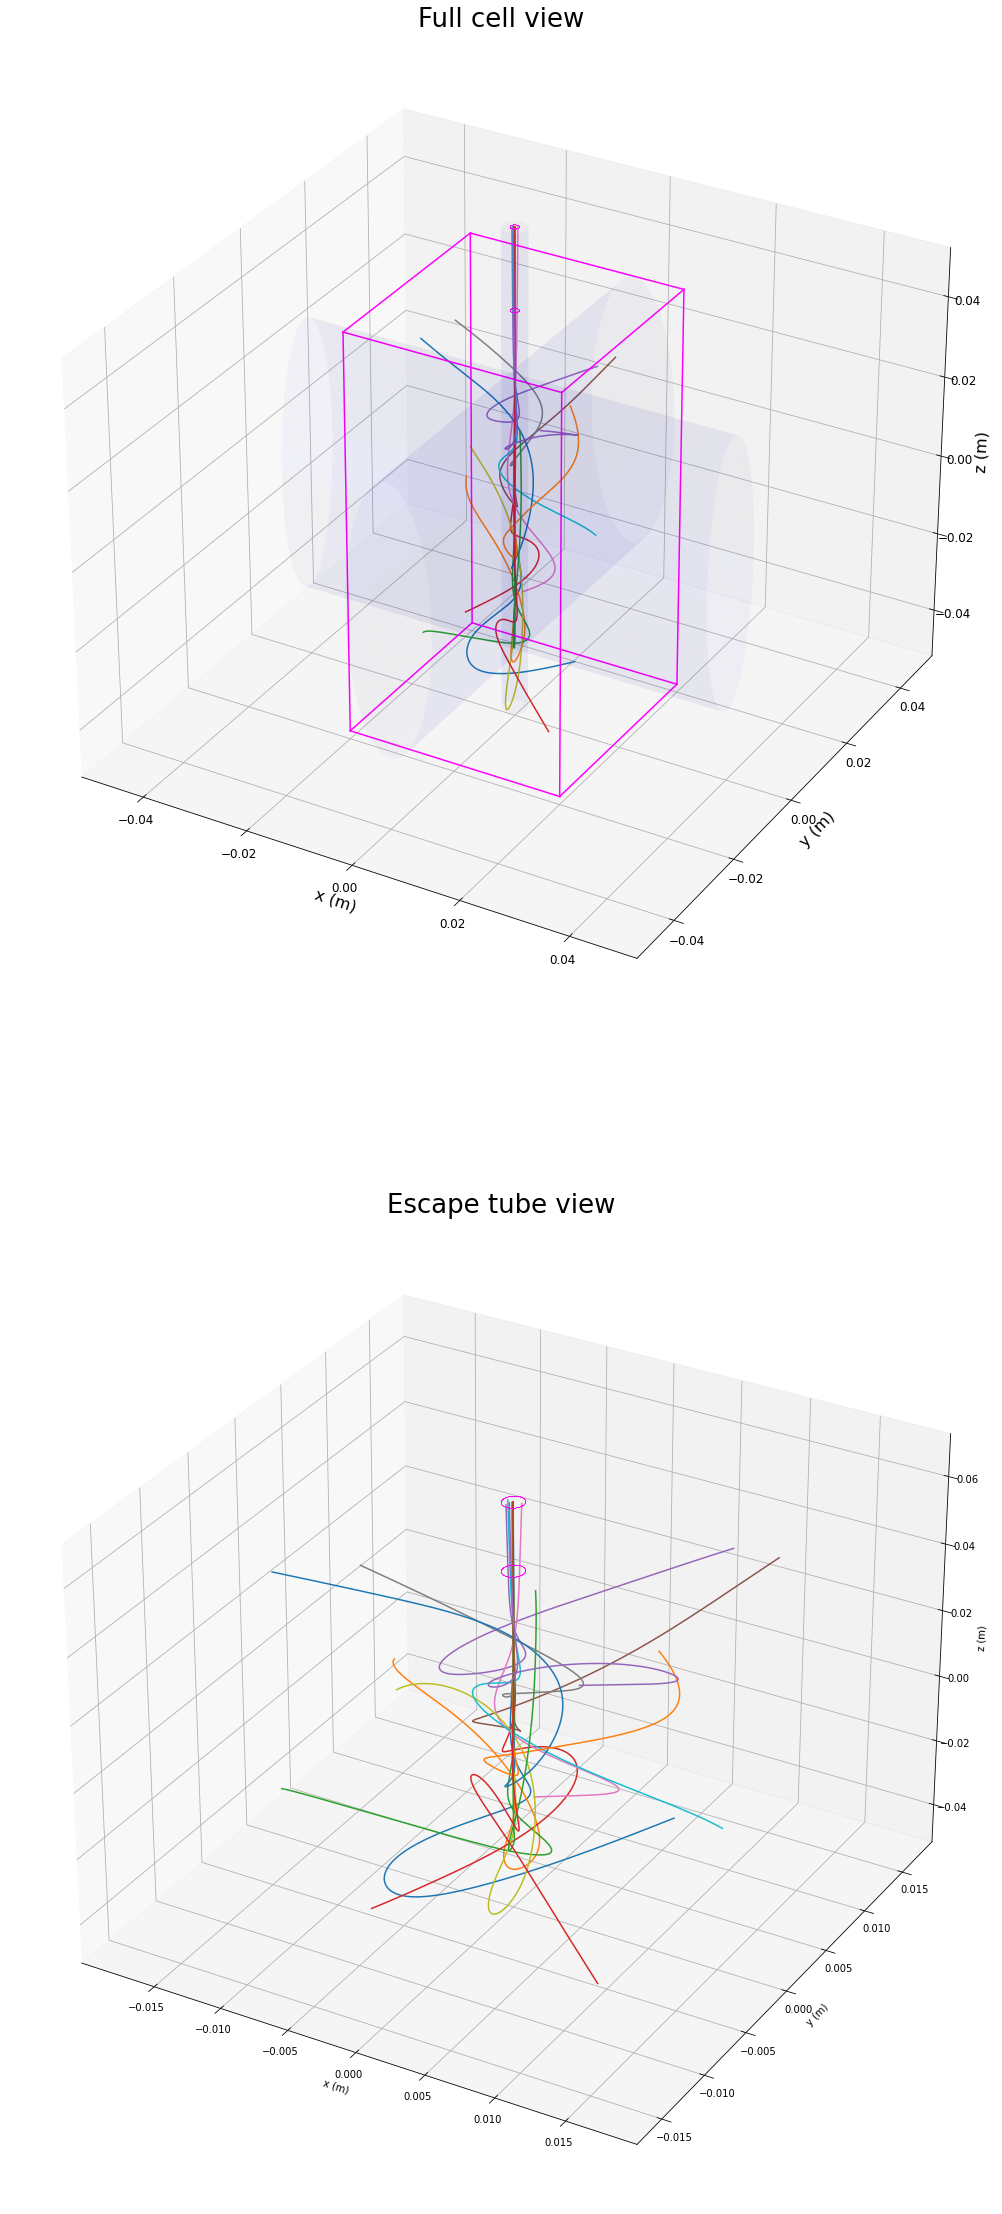

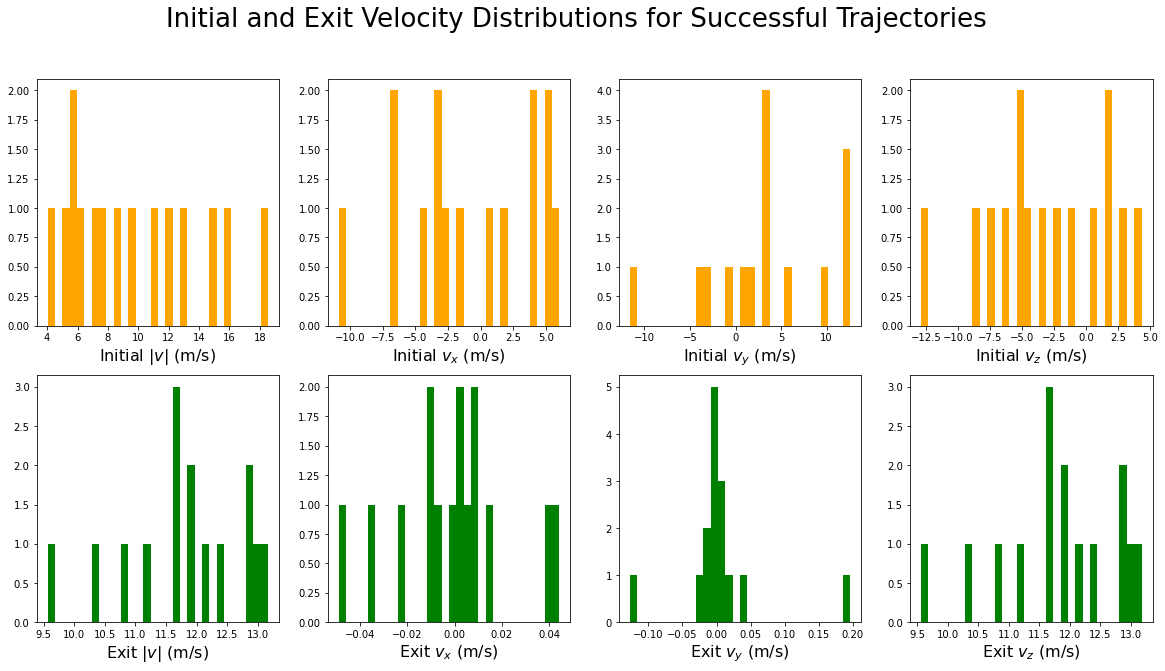

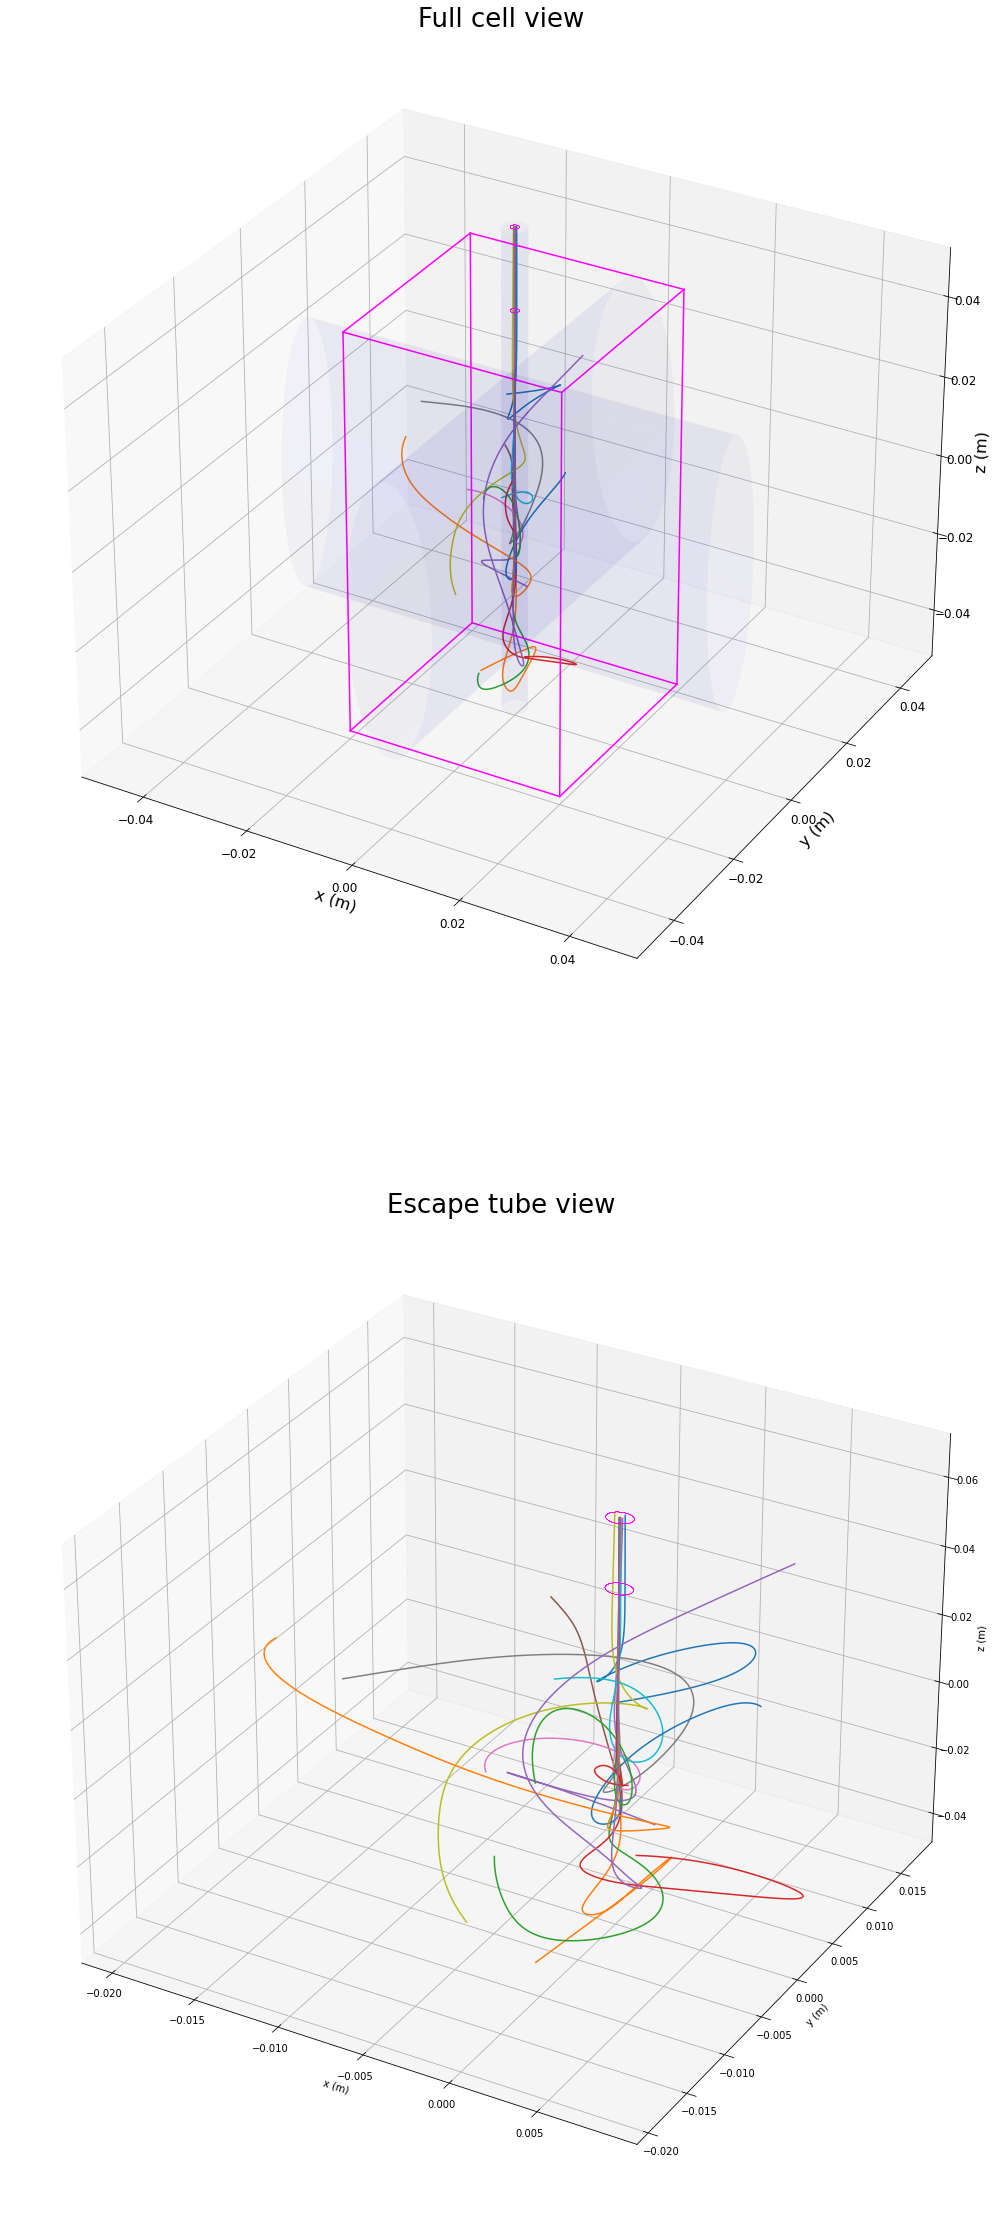

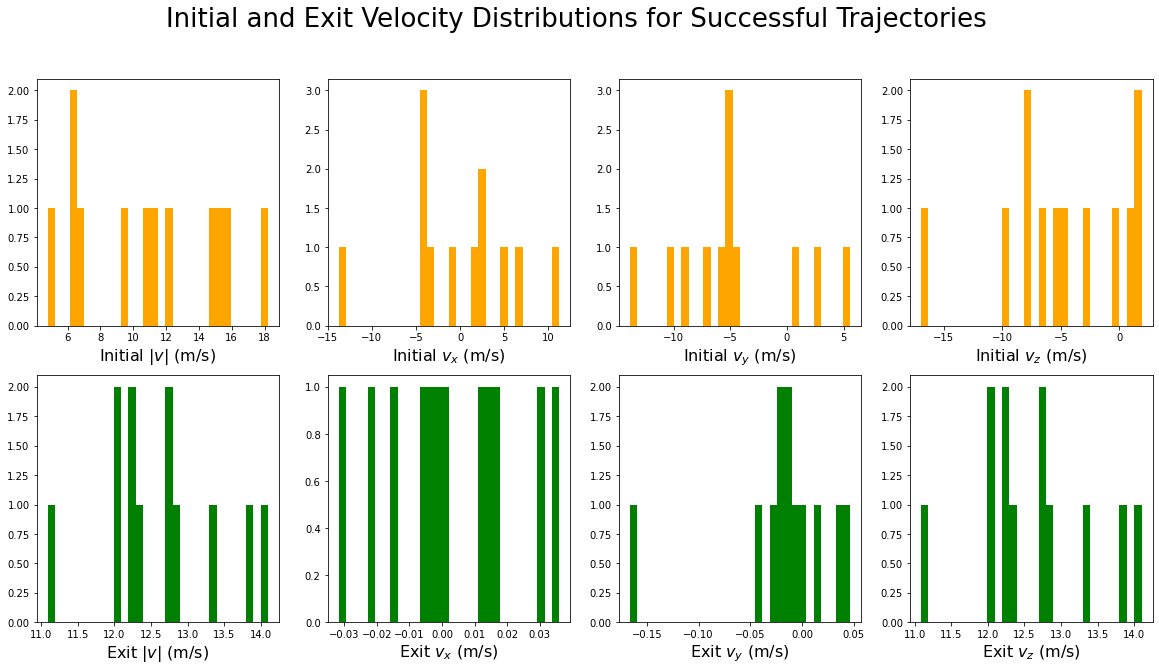

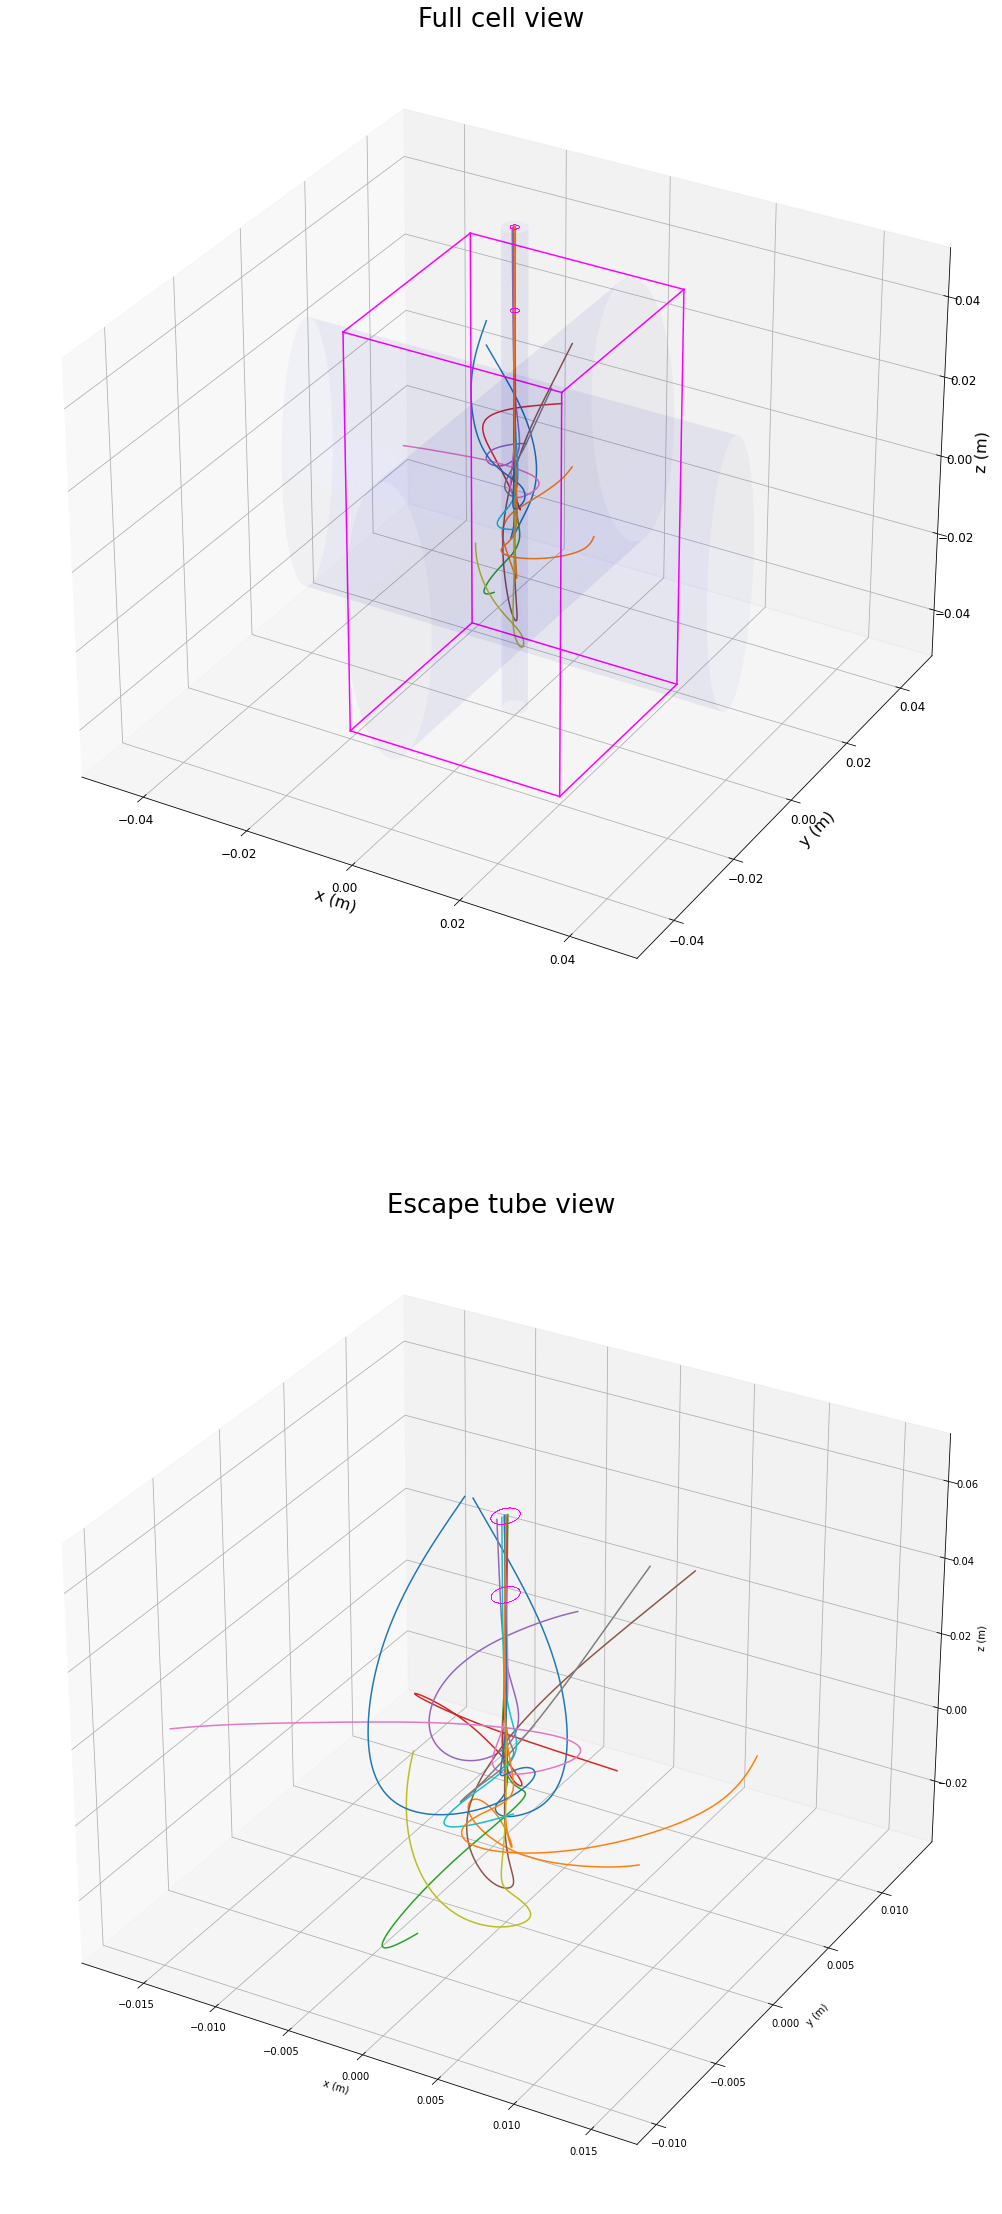

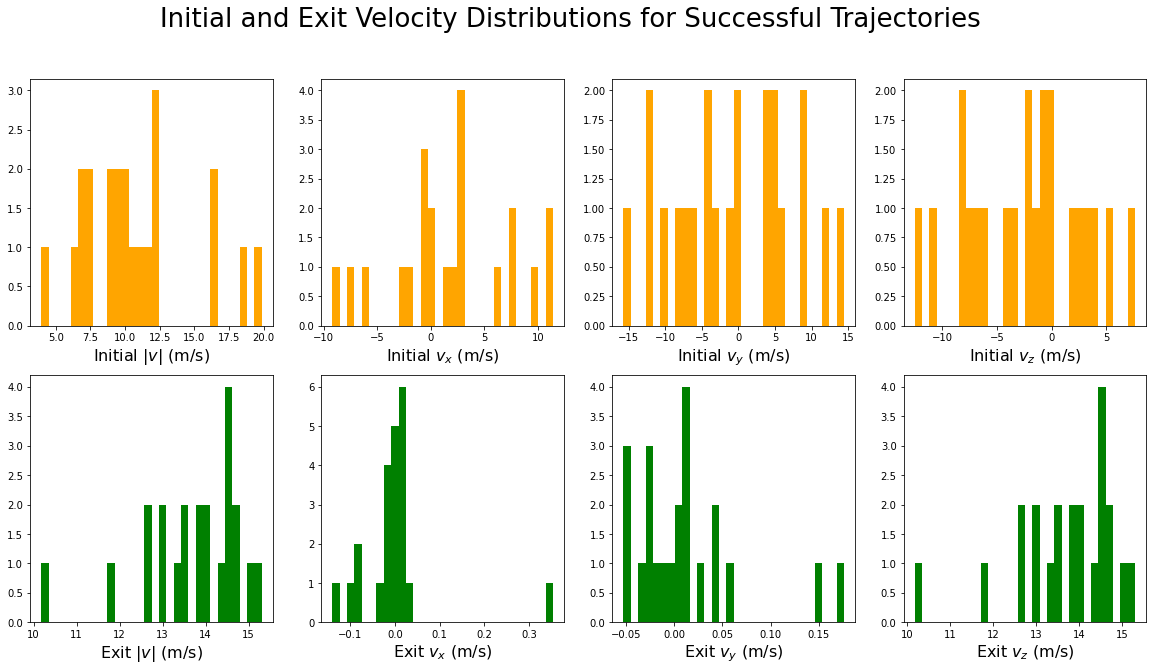

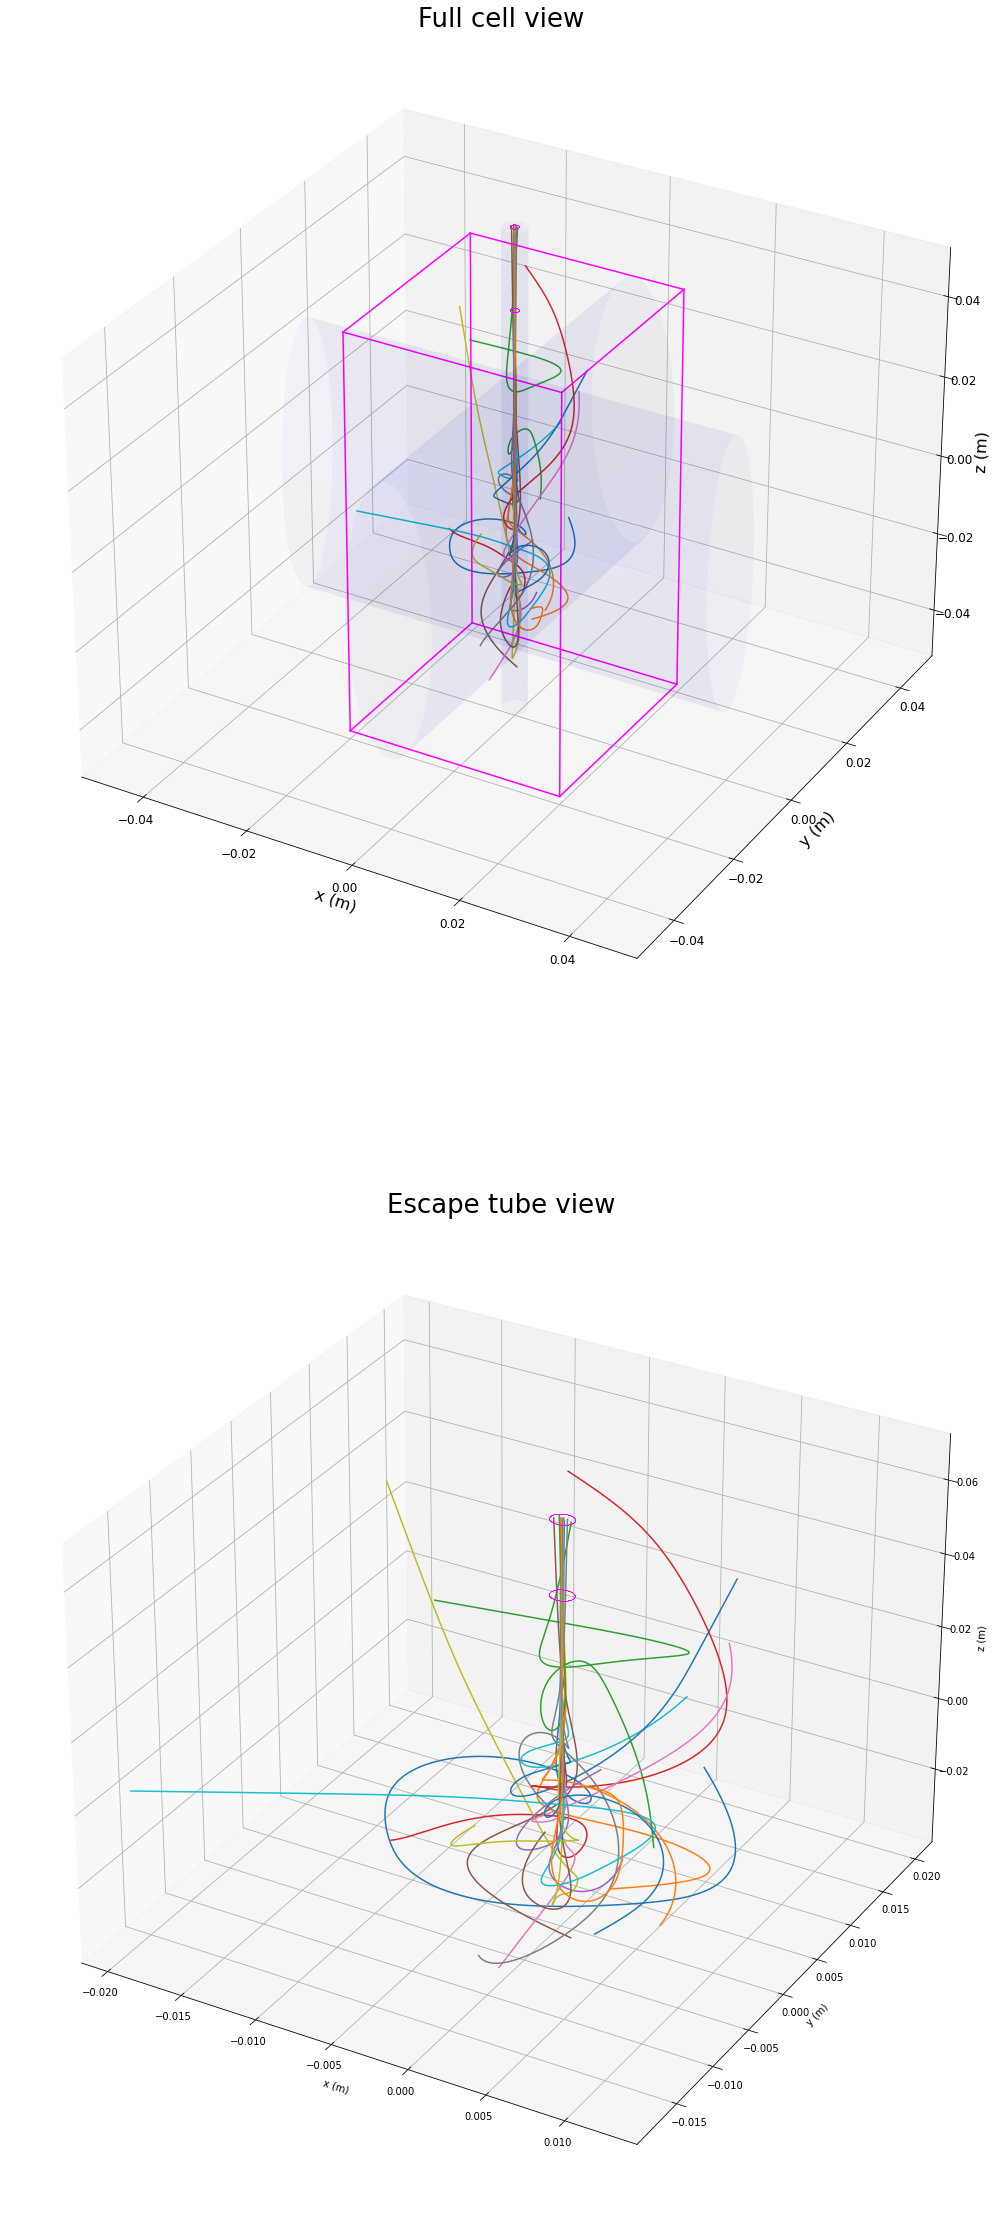

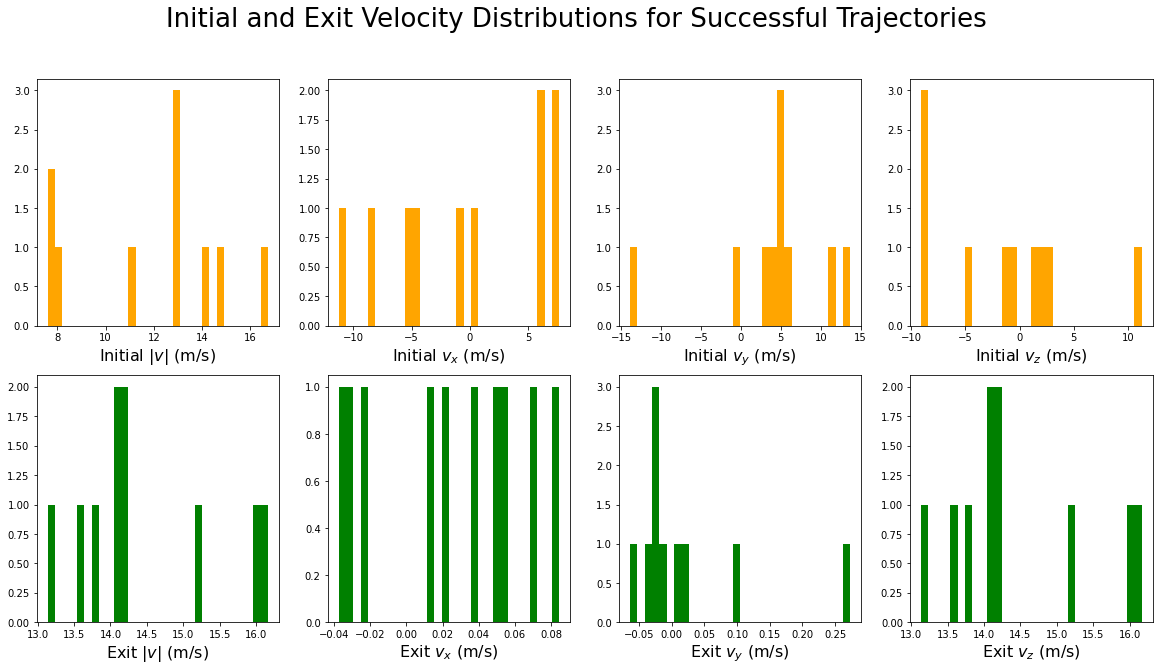

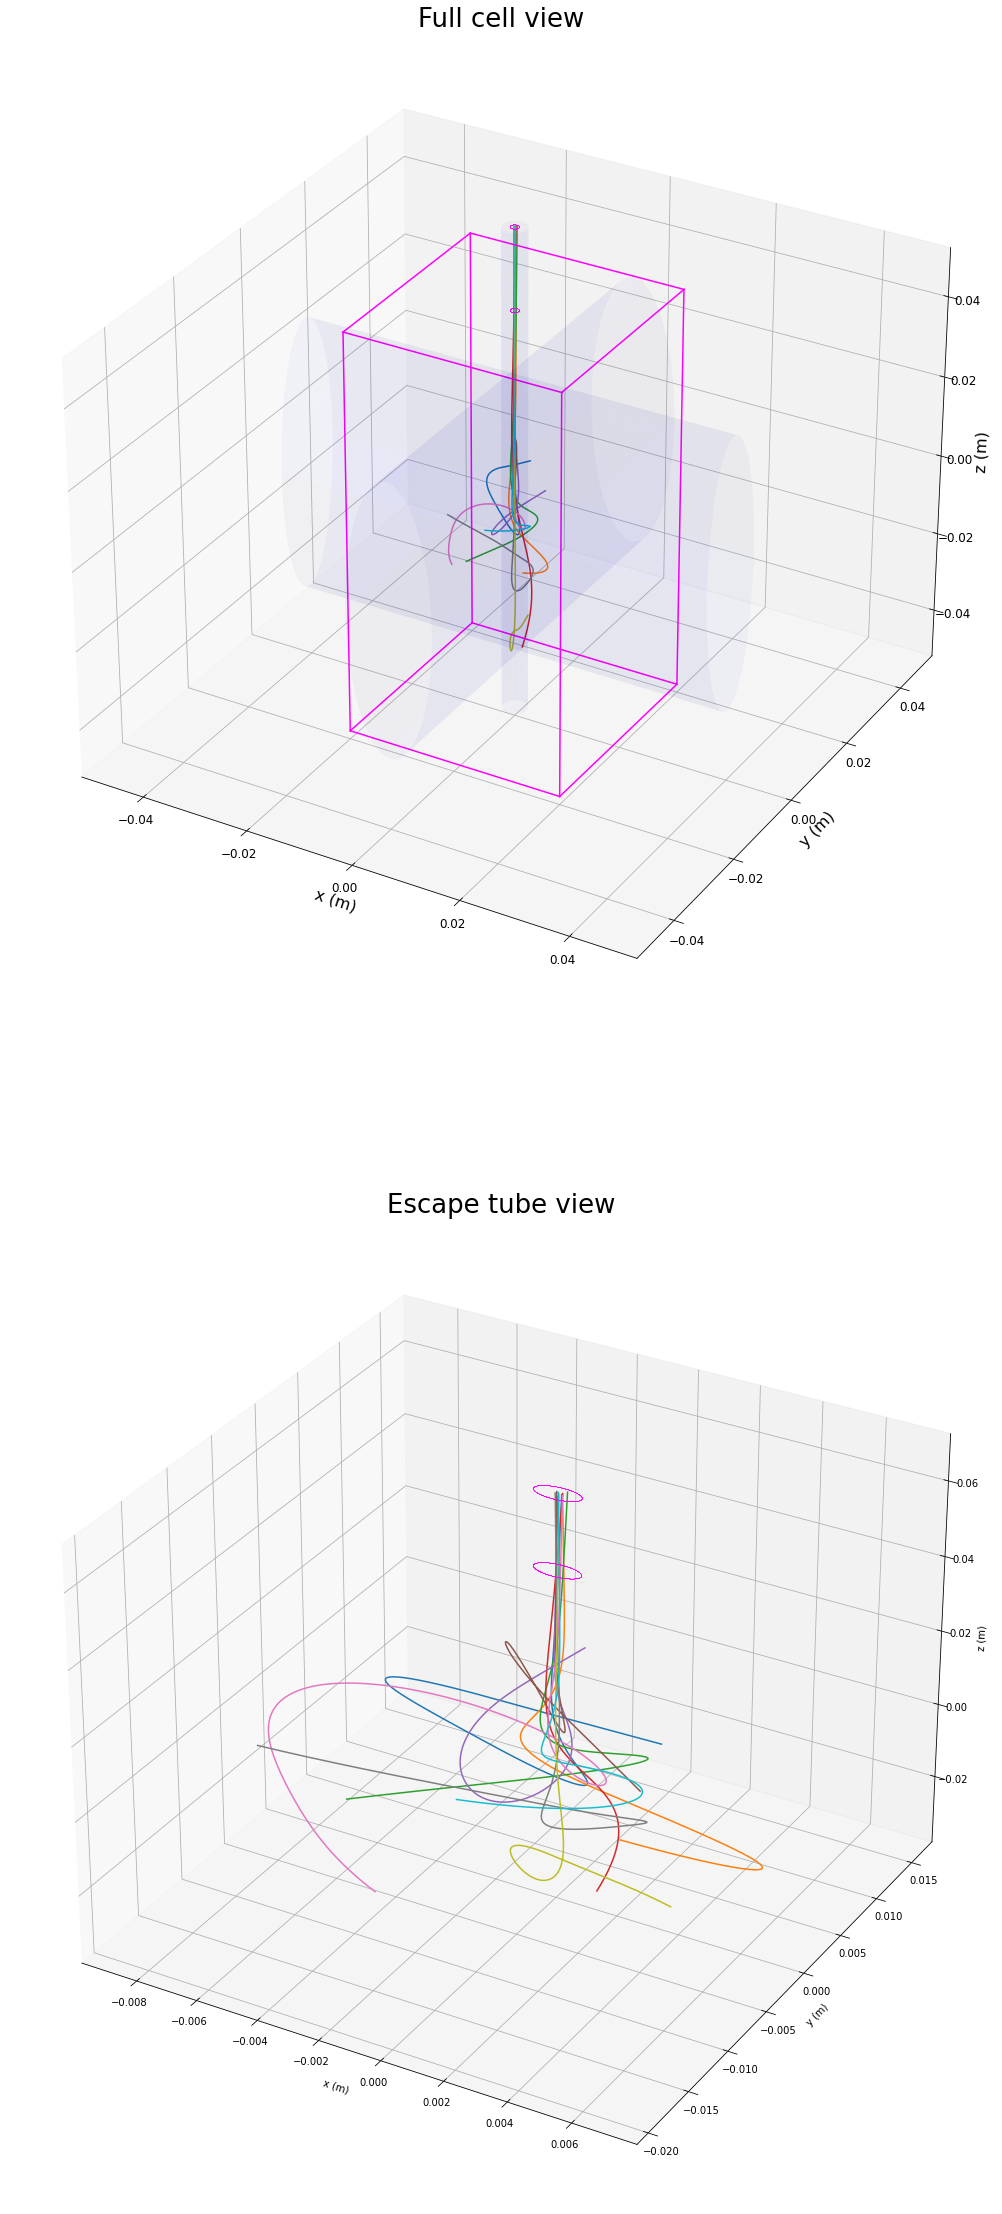

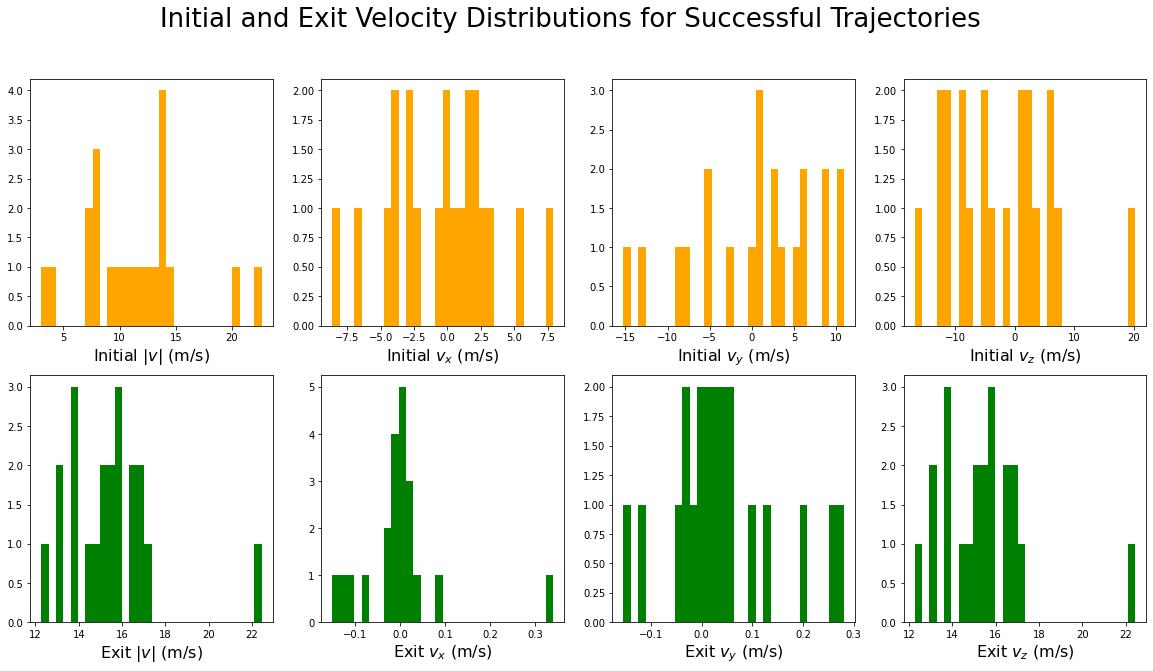

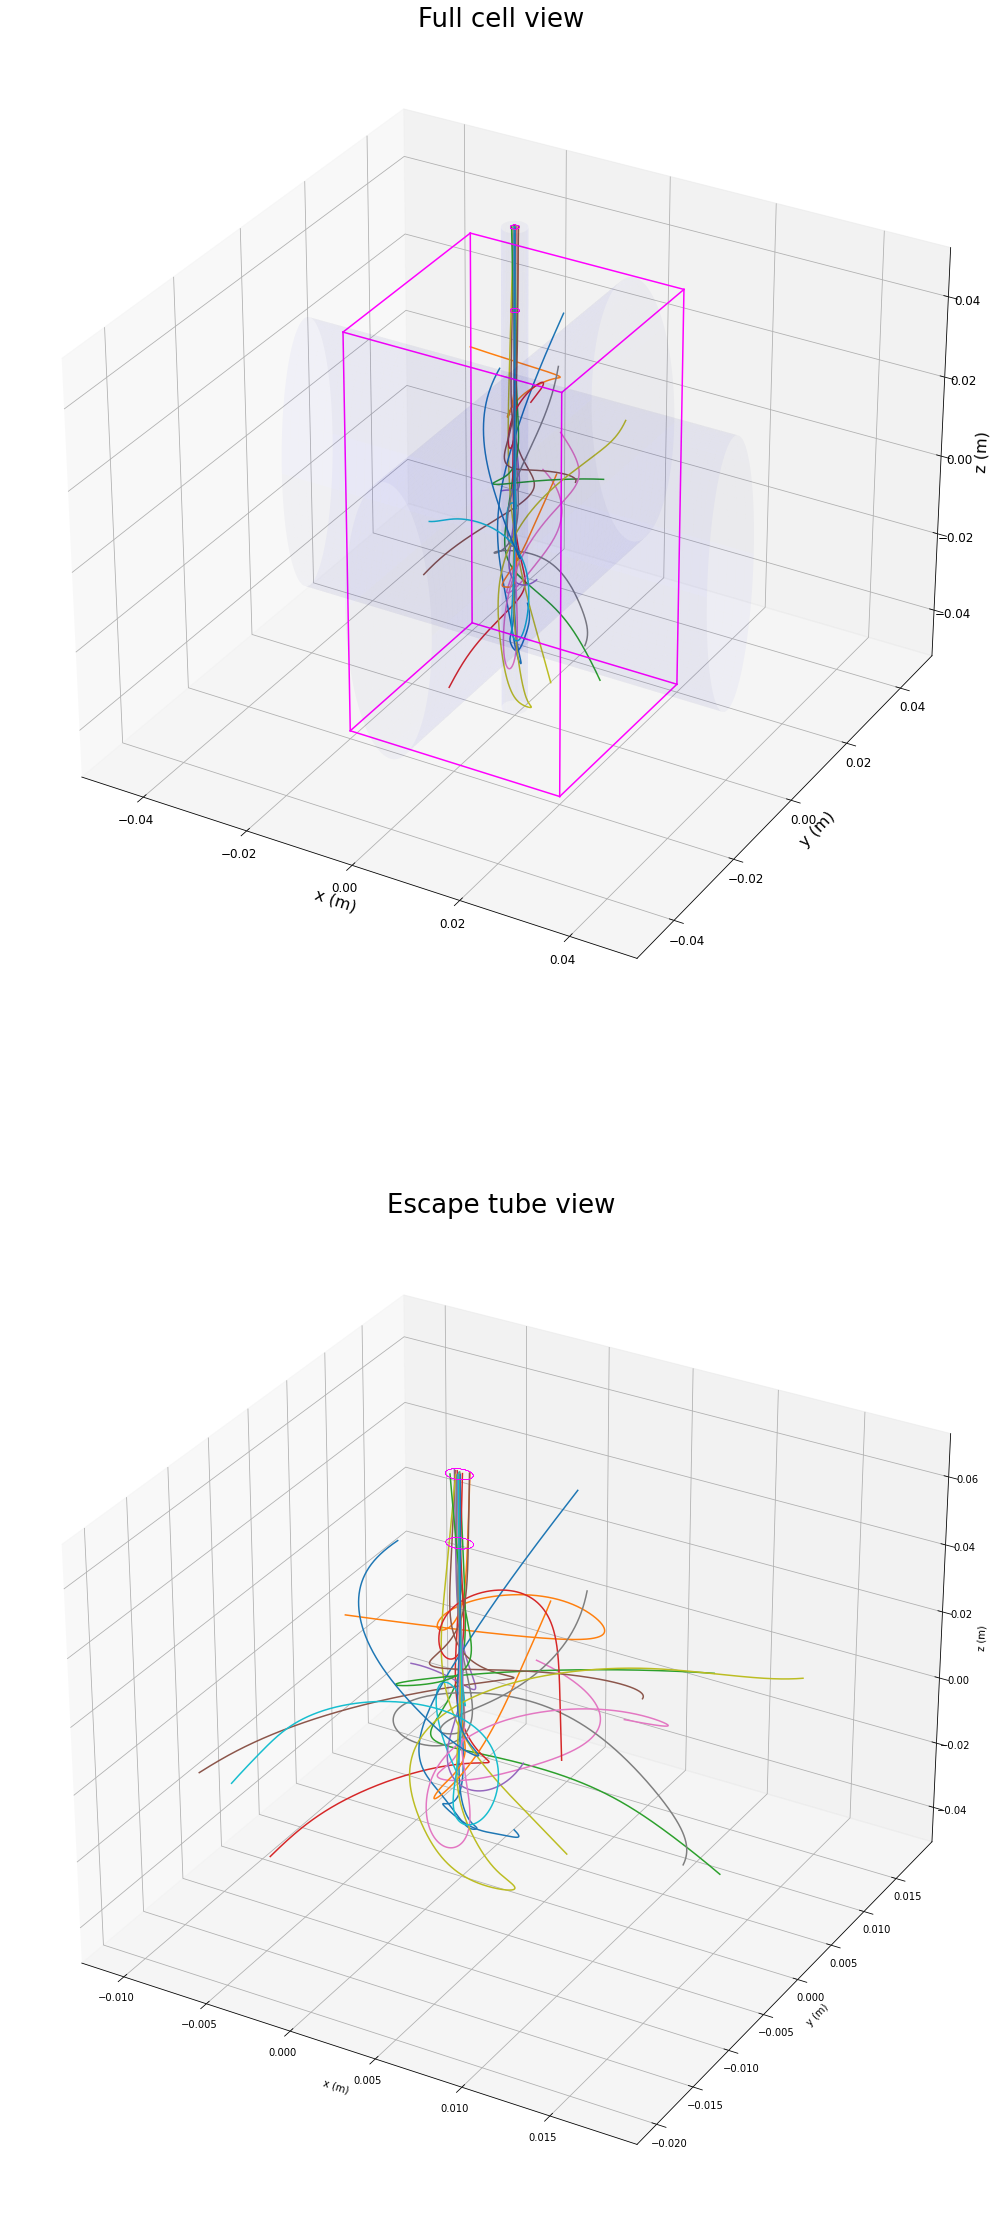

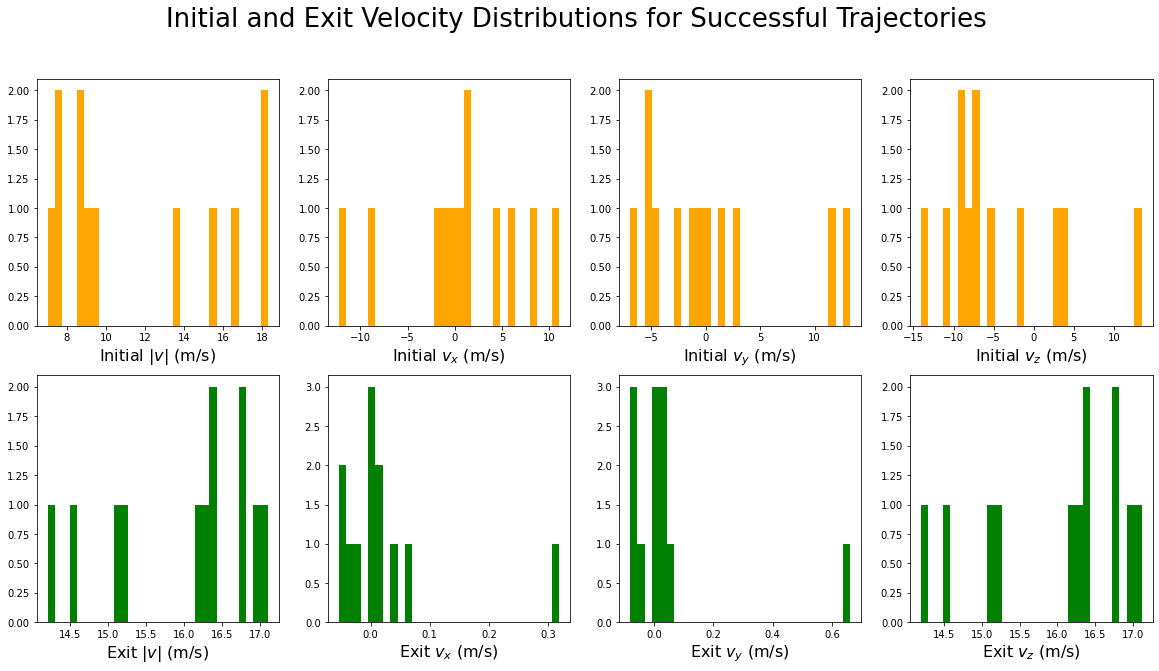

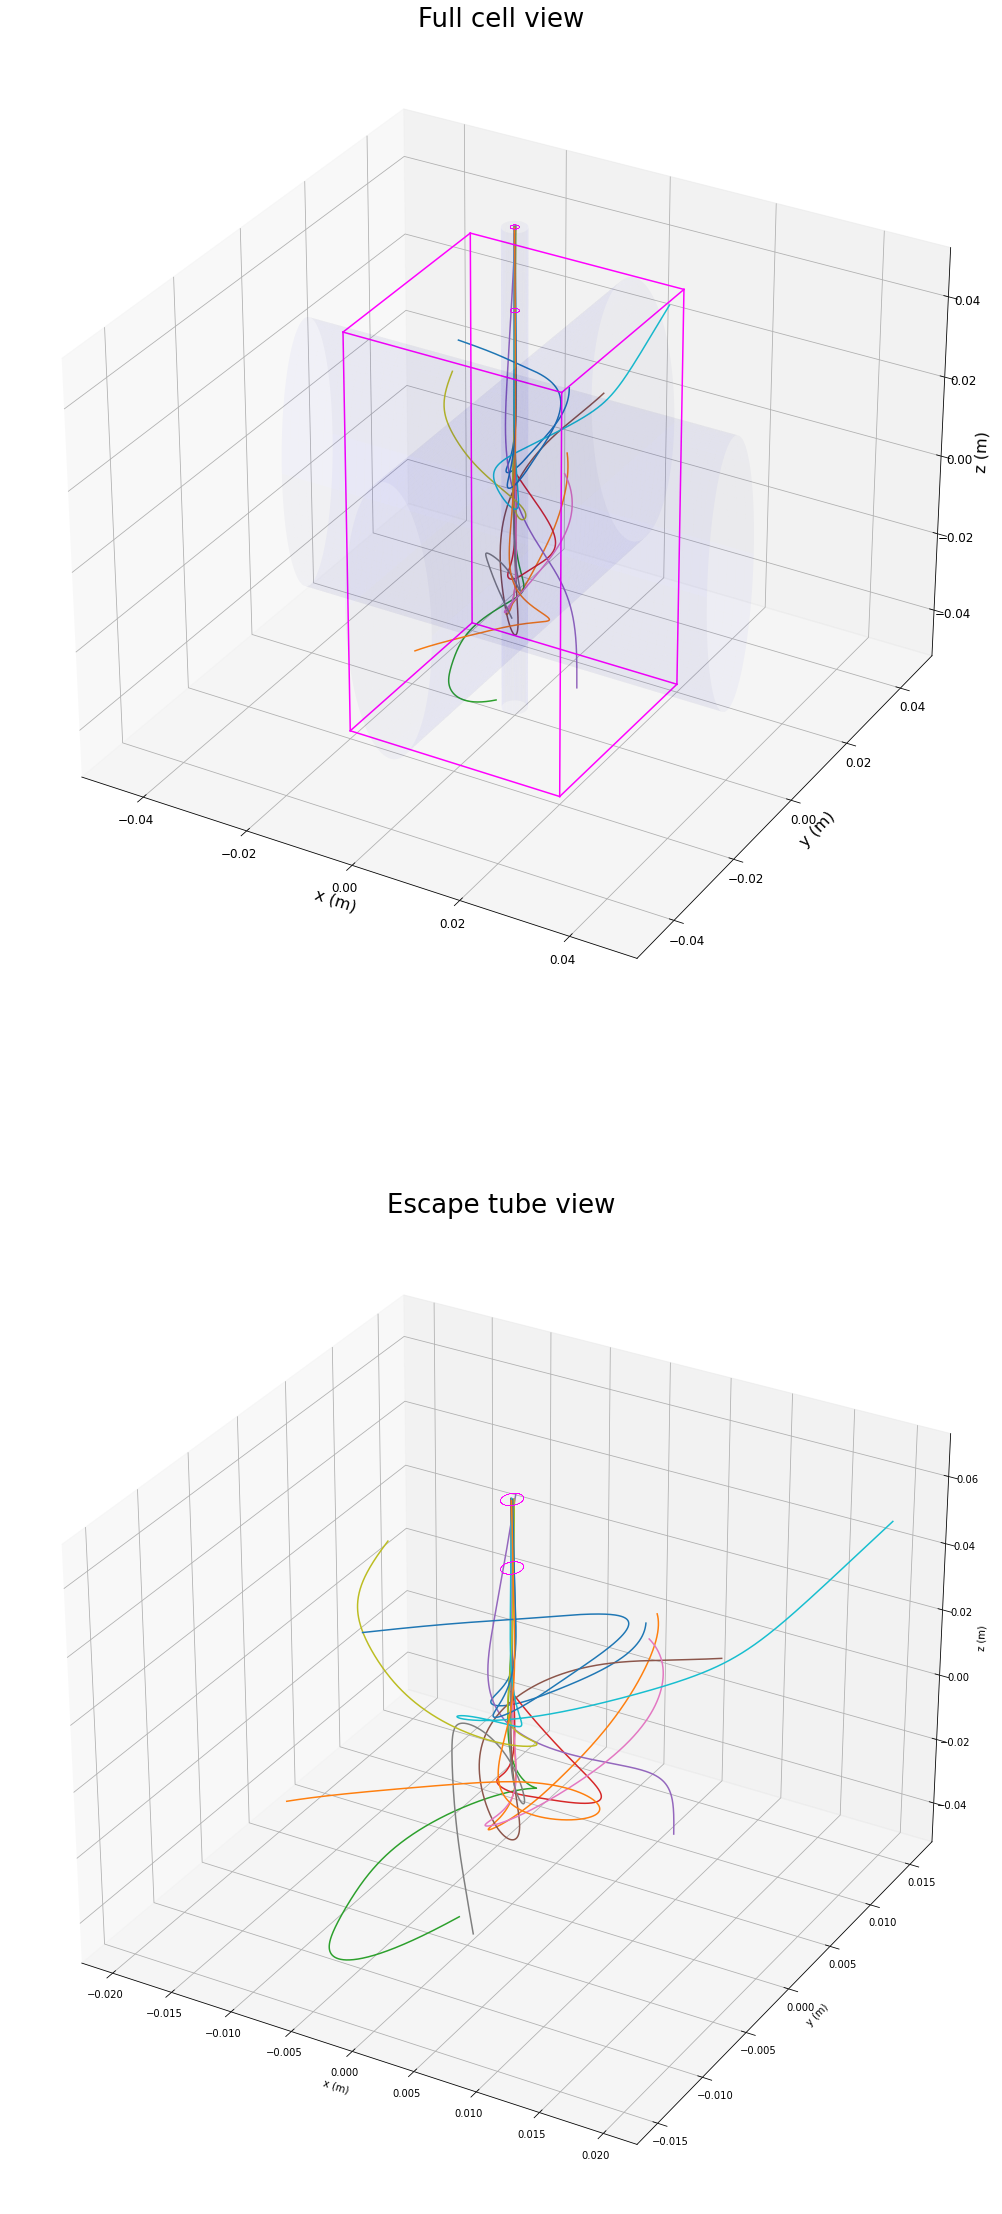

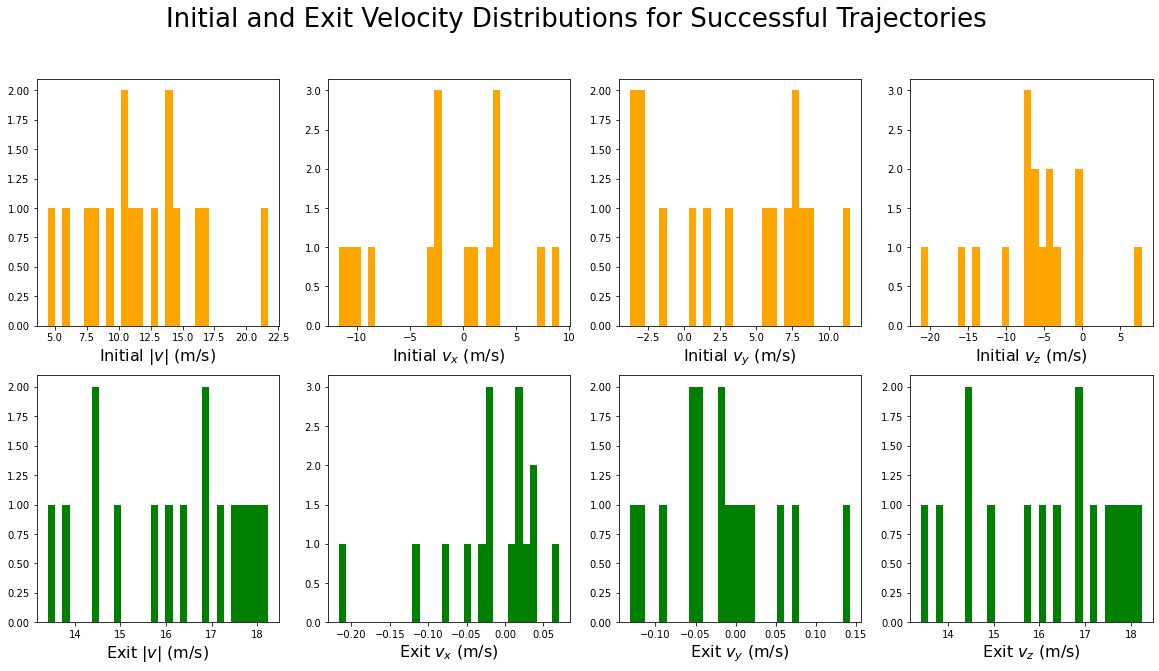

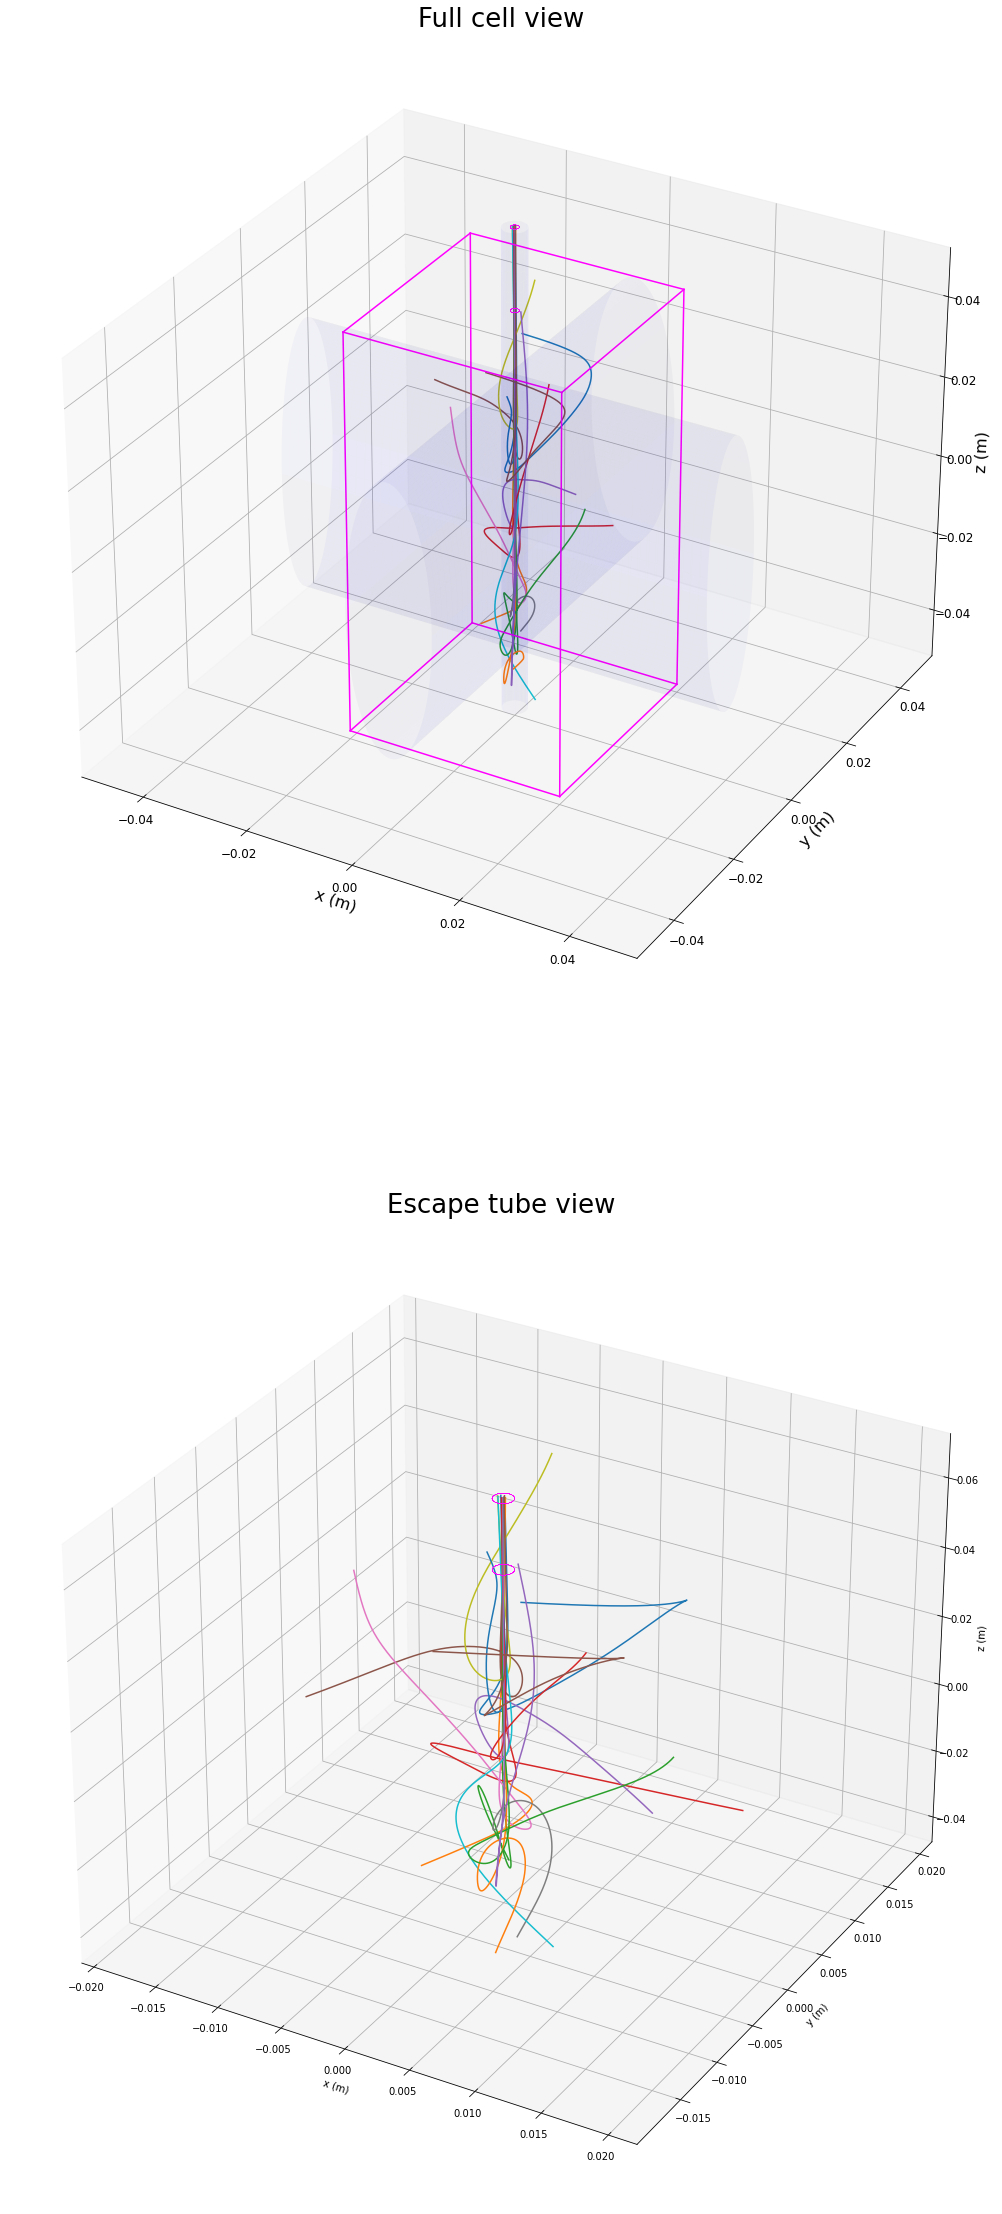

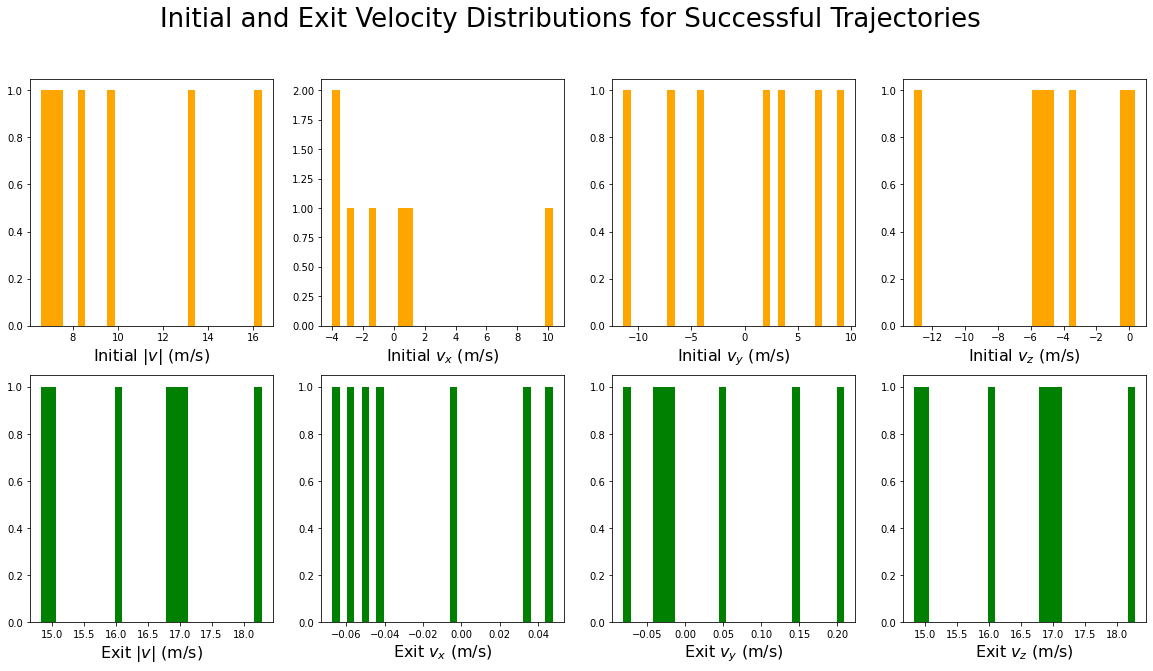

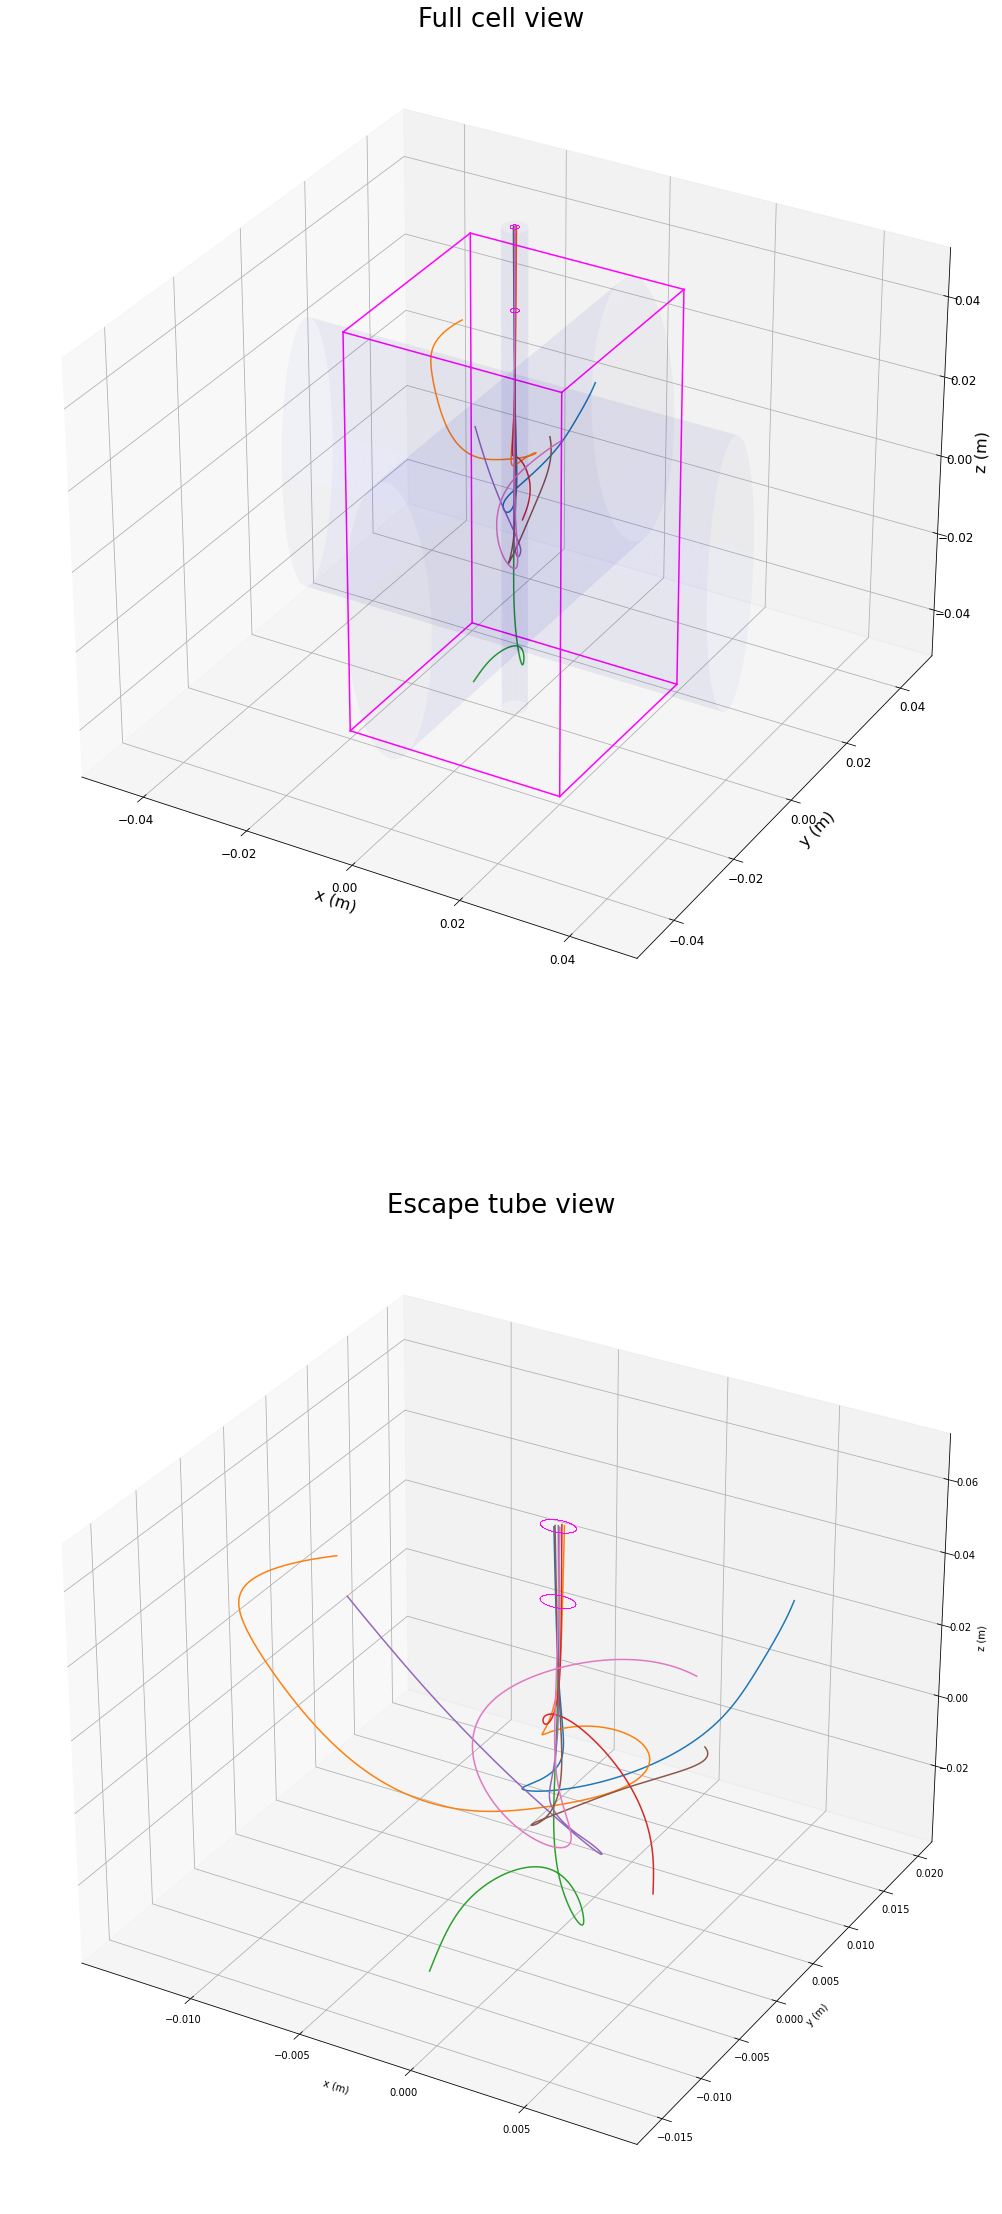

In [42]:
# Let's do a search over push beam intensities.
foldername="CoarsePushSearch1"
subprocess.Popen("mkdir " + foldername, stdout=subprocess.PIPE, shell=True)
s0_push_range = [0,2,4,6,8,10,12,14,16, 18, 20] #, 3, 4, 5, 6] # in s0 = I/I_sat units.
N_sim = 300000
   

# For results: alpha = captures/N_sim
successes_rec = []
capture_efficiencies = []

for s0_push in s0_push_range:
    subfoldername = foldername+"/s0push_"+str(s0_push)
    subprocess.Popen("mkdir " + subfoldername, stdout=subprocess.PIPE, shell=True)
    print("Starting sim for s0_push =", s0_push)
    # Tracking through 2D MOT chamber + tube
    pos_rec, vel_rec, times_rec, forces_rec, success_index, successes = startSim(tree, Bfields, N_sim, verbose=True)
    successes_rec.append(successes)
    
    # Proceed if at least one atom made it through the escape tube.
    if successes > 0:
        #printTrajectory(foldername, pos_rec, vel_rec, forces_rec, times_rec, index=0)
        printHistograms(subfoldername, vel_rec, success_index)
        print3D(subfoldername, pos_rec, success_index)
    
        # Tracking to 3D MOT Chamber
        MOT_tube_zrel = .55 #.55 # m, equal to 55cm.
        captureRadius = .01 # m, equal to 1cm. This is the radius of the 3D MOT capture region.
        dt = 10 * 10**(-6) # s
        captures, positions_record = trackToChamber(MOT_tube_zrel, captureRadius, dt)
        
        capture_efficiencies.append(captures/N_sim)
    else:
        capture_efficiencies.append(0)

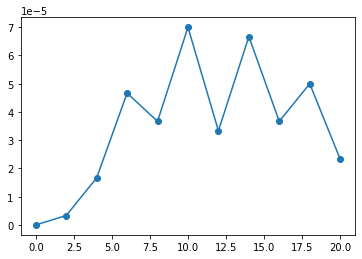

In [50]:
plt.scatter(s0_push_range, capture_efficiencies)
plt.plot(s0_push_range, capture_efficiencies)

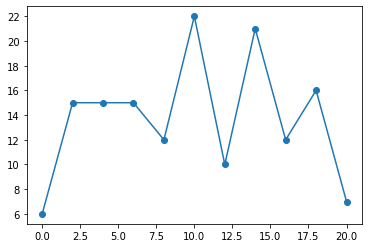

In [51]:
plt.scatter(s0_push_range, successes_rec)
plt.plot(s0_push_range, successes_rec)

### Parameter search utilities

In [ ]:
# Write run summary
def writeSummary(foldername):
    file = open(foldername+"0_SUMMARY.txt", "w+")
    file.write("===== RUN SUMMARY =====\n")
    file.write("N_sim: " + str(N_sim) + "\n")